# Bank Marketing

# 1. Attribute Information

1. Bank client data:

   - Age (numeric)
   - Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
   - Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
   - Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
   - Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
   - Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
   - Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

2. Related with the last contact of the current campaign:

   - Contact: contact communication type (categorical:
    'cellular','telephone')
   - Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
    …, 'nov', 'dec')
   - Dayofweek: last contact day of the week (categorical:
    'mon','tue','wed','thu','fri')
   - Duration: last contact duration, in seconds (numeric). Important
    note: this attribute highly affects the output target (e.g., if
    duration=0 then y='no'). Yet, the duration is not known before a call
    is performed. Also, after the end of the call y is obviously known.
    Thus, this input should only be included for benchmark purposes and
    should be discarded if the intention is to have a realistic
    predictive model.

3. Other attributes:

   - Campaign: number of contacts performed during this campaign and for
    this client (numeric, includes last contact)
   - Pdays: number of days that passed by after the client was last
    contacted from a previous campaign (numeric; 999 means client was not
    previously contacted)
   - Previous: number of contacts performed before this campaign and for
    this client (numeric)
   - Poutcome: outcome of the previous marketing campaign (categorical:
    'failure','nonexistent','success')

4. Social and economic context attributes

   - Emp.var.rate: employment variation rate - quarterly indicator
    (numeric)
   - Cons.price.idx: consumer price index - monthly indicator (numeric)
   - Cons.conf.idx: consumer confidence index - monthly indicator
    (numeric)
   - Euribor3m: euribor 3 month rate - daily indicator (numeric)
   - Nr.employed: number of employees - quarterly indicator (numeric)


## 1.1. Importing Dependencies & Loading the Data

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("bank-additional-full.csv", sep=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# 2. Data Cleaning

In [4]:
#snake case tranformation
df.columns = df.columns.str.replace(".", "_", regex=True) #replacing dots

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

## 2.1. Nan Values

In [6]:
df.isna().sum()
# checking for nans, there are none

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

## 2.2. Feature Cleaning

In [7]:
#we are reducing labels of some of the features
df['education'] = df['education'].replace(['university.degree','high.school','basic.9y','professional.course','basic.4y','basic.6y','unknown','illiterate'],
                                          ['High','Secondary','Low','Secondary','Low','Low','Low','Low'])
df['job'] = df['job'].replace(['unknown'],['unemployed'])
df['marital'] = df['marital'].replace(['divorced','unknown'],
                                          ['other','other'])
df #sanity check

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,Low,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,Secondary,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,Secondary,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,Low,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,Secondary,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,Secondary,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,Secondary,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,High,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,Secondary,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [7]:
# see below in 3.5 for outliers analysis

# 3. EDA

In [8]:
df.shape #checking basic descriptive information of dataset

(41188, 21)

In [9]:
df.info() #checking basic descriptive information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [10]:
df.describe() #checking basic descriptive information of dataset

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## 3.1. Checking the Normality of the Target Variable

In [11]:
df.y.value_counts(normalize=True)
# checking target variable for imbalance

no     0.887346
yes    0.112654
Name: y, dtype: float64

In [12]:
#target variable y is unbalanced, certain sampling techniques will be applied in order for address this.
#see below in 5. Random Forest and Modeling

## 3.2. Continuous Variables

C:\Users\lazar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


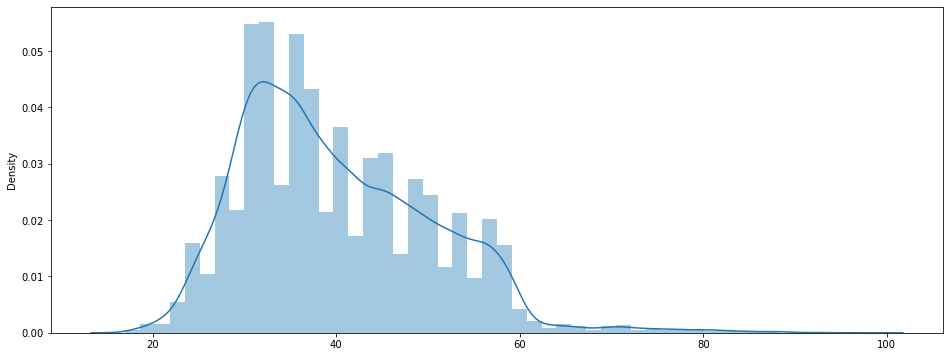

C:\Users\lazar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


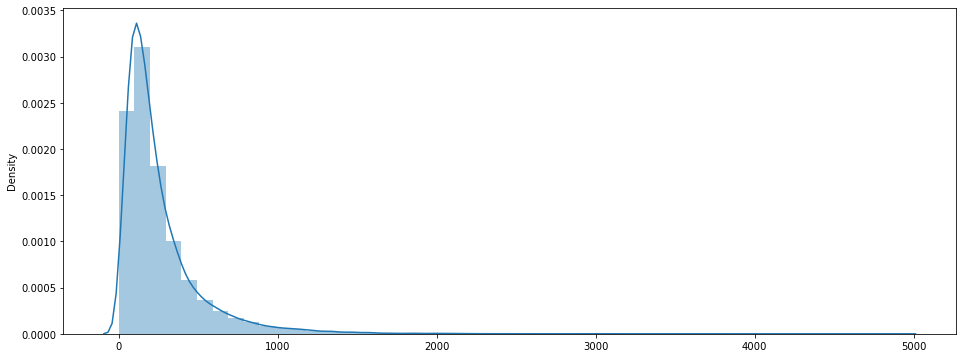

C:\Users\lazar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


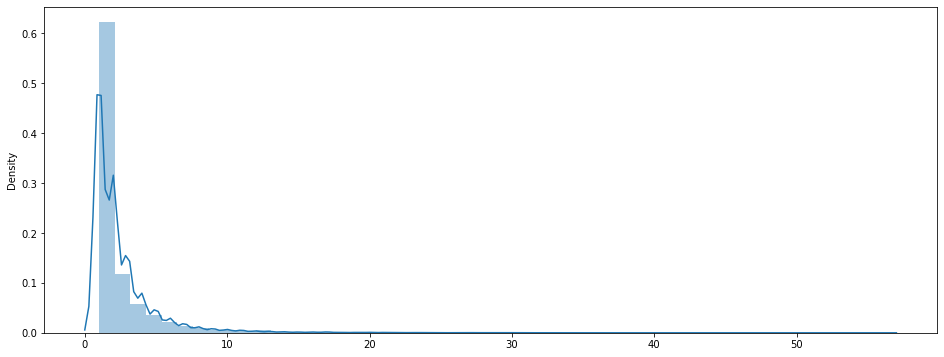

C:\Users\lazar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


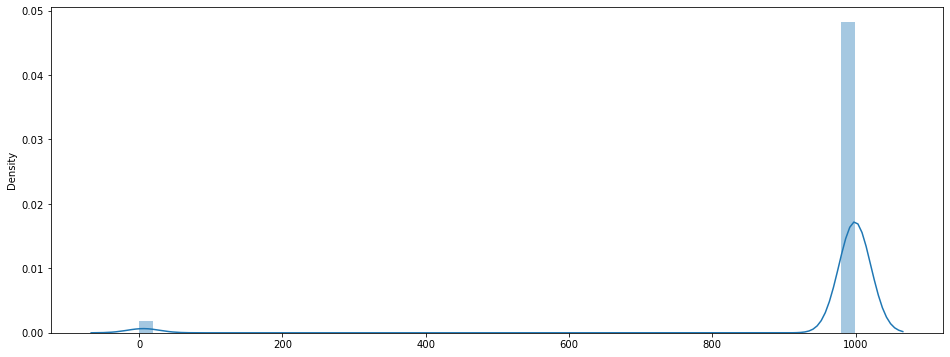

C:\Users\lazar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


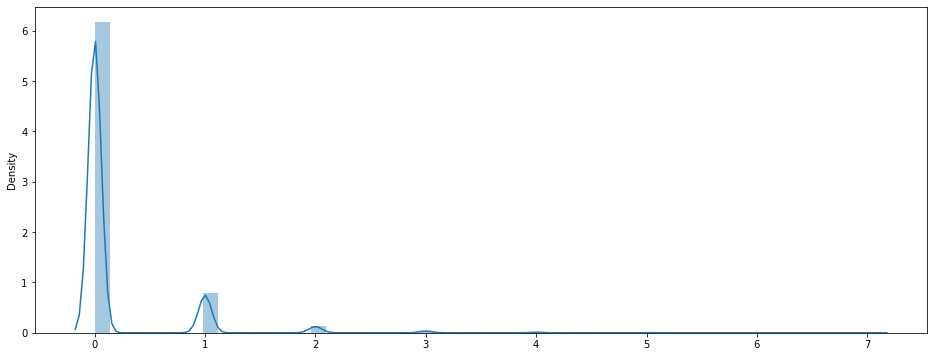

C:\Users\lazar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


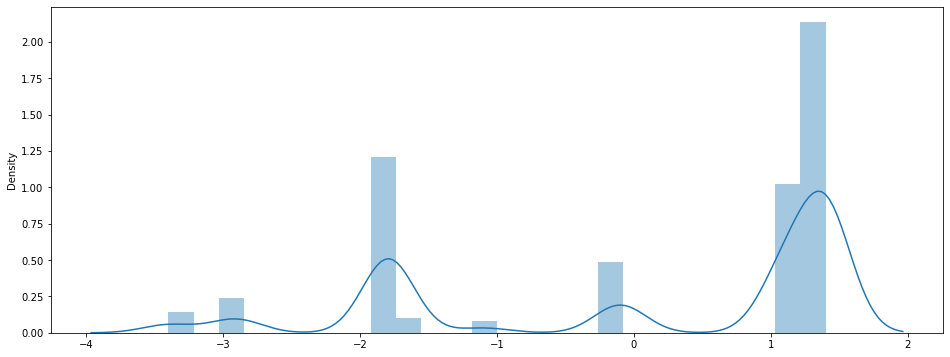

C:\Users\lazar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


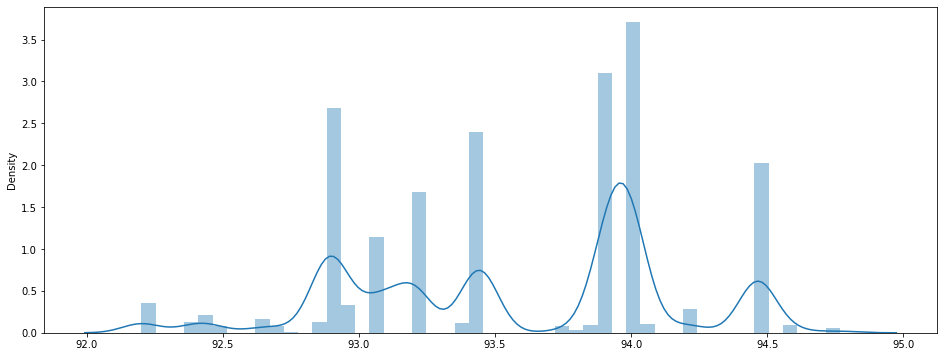

C:\Users\lazar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


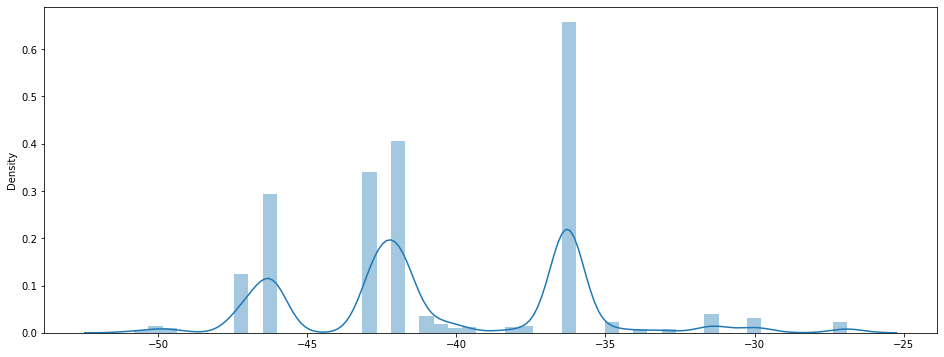

C:\Users\lazar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


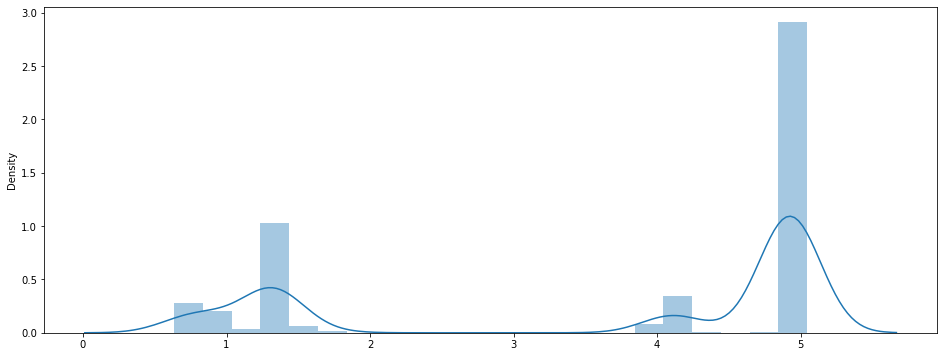

C:\Users\lazar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


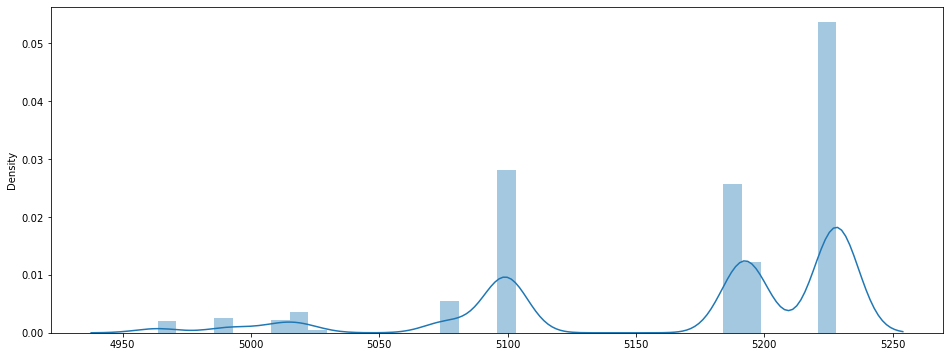

In [13]:
continuous_variables = df.select_dtypes(include='number')
#choosing the continuous variables

#univariate analysis - distribution plots
for variables in continuous_variables:
    plt.figure(figsize=(16,6))
    sns.distplot(df, x=df[variables], kde=True)
    plt.show()

In [15]:
#our data doesn't seem to be normally distributed

## 3.3 Categorical Variables

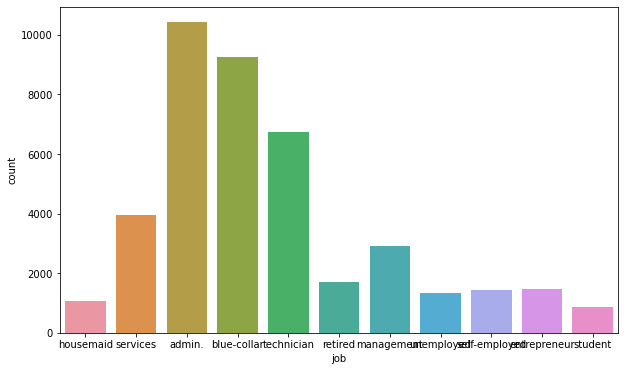

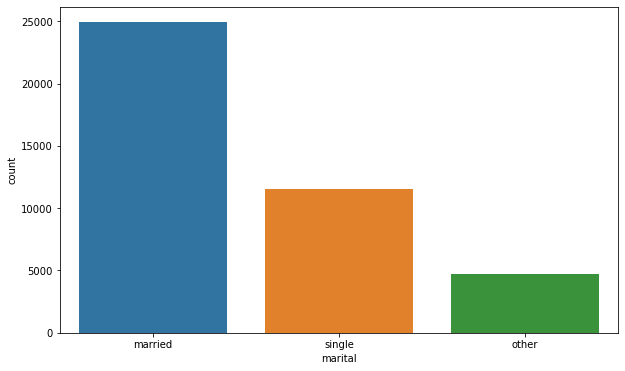

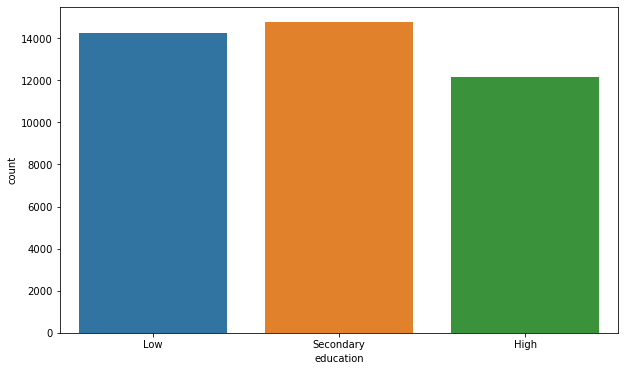

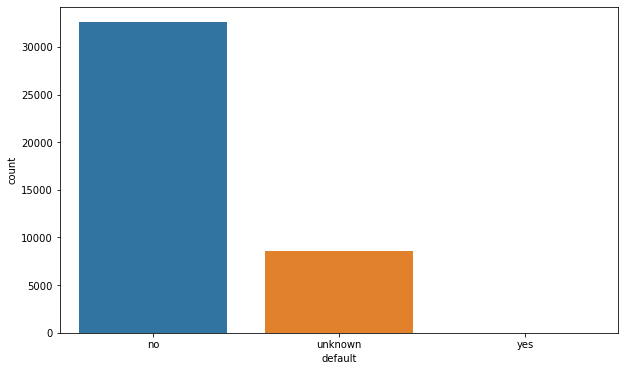

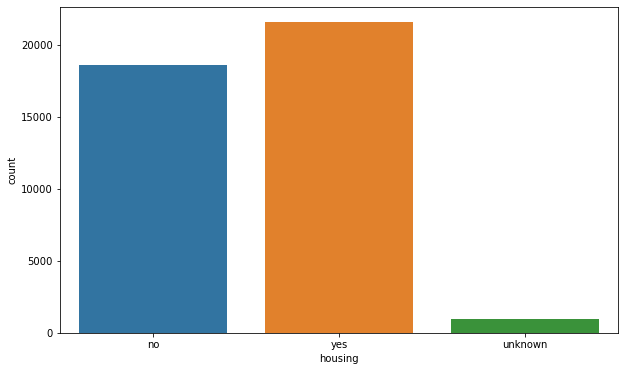

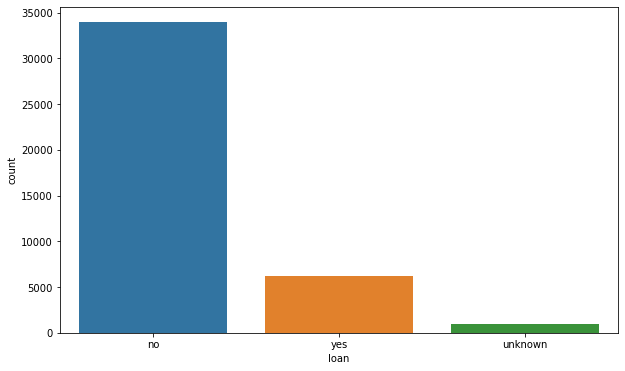

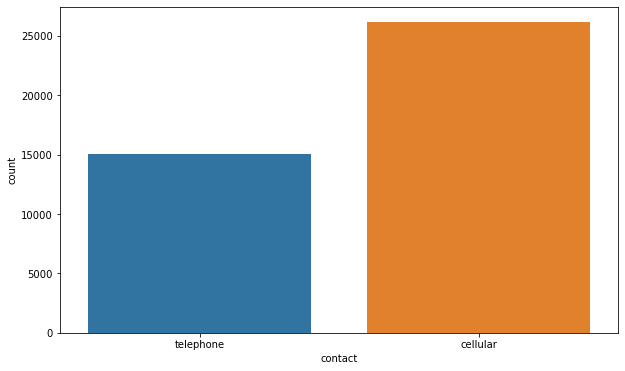

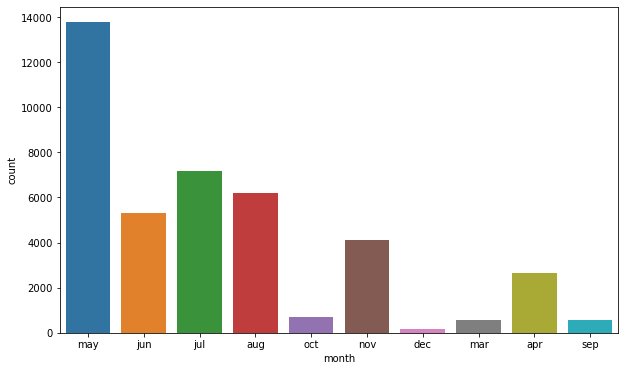

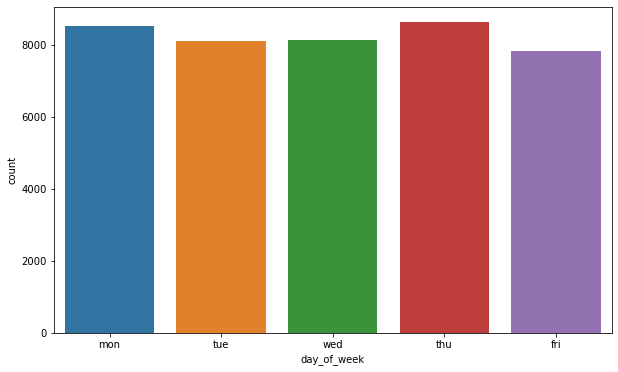

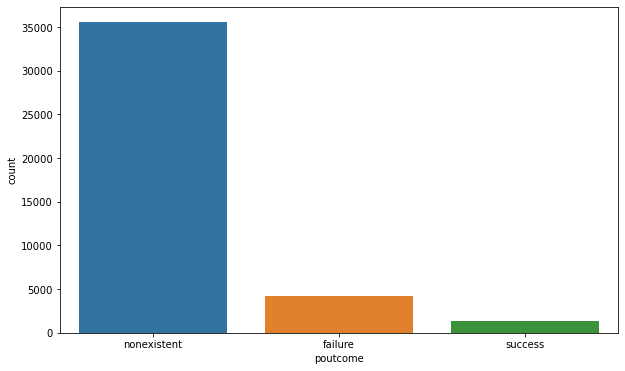

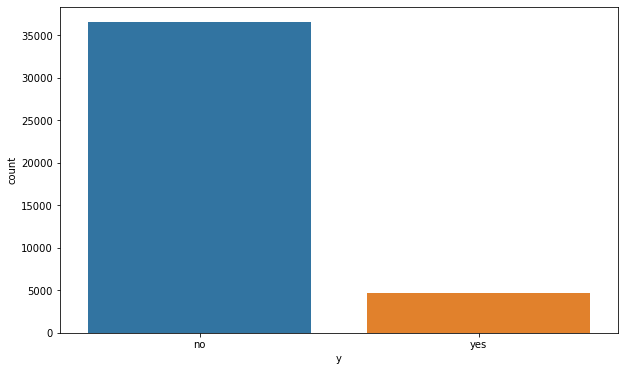

In [14]:
#count plots for categorical variables
categoricals = df.select_dtypes(exclude='number')

for variables in categoricals:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x=df[variables])
    plt.show()

In [15]:
# Further Examination of categorical Variables

for column in categoricals:
    print('\033[1m', column)
    print('\033[0m', categoricals[column].value_counts(dropna=False, normalize=True))

 job
 admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
unemployed       0.032631
housemaid        0.025736
student          0.021244
Name: job, dtype: float64
 marital
 married    0.605225
single     0.280859
other      0.113917
Name: marital, dtype: float64
 education
 Secondary    0.358308
Low          0.346266
High         0.295426
Name: education, dtype: float64
 default
 no         0.791201
unknown    0.208726
yes        0.000073
Name: default, dtype: float64
 housing
 yes        0.523842
no         0.452122
unknown    0.024036
Name: housing, dtype: float64
 loan
 no         0.824269
yes        0.151695
unknown    0.024036
Name: loan, dtype: float64
 contact
 cellular     0.634748
telephone    0.365252
Name: contact, dtype: float64
 month
 may    0.334296
jul    0.174177
aug    0.149995
jun    0.129115
nov    0.099568
apr   

### 3.3.2. Visualizing our Target Variable

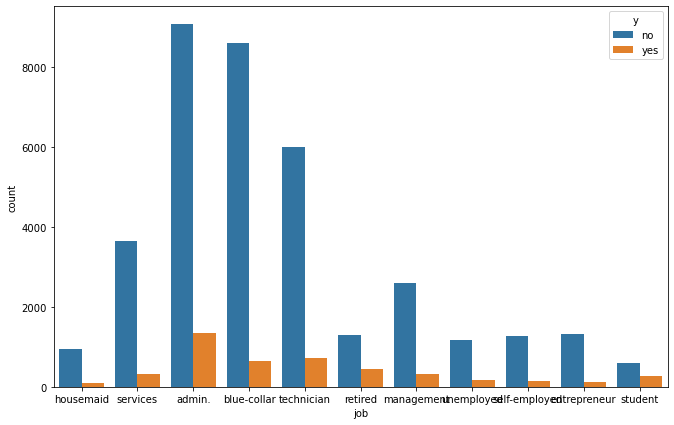

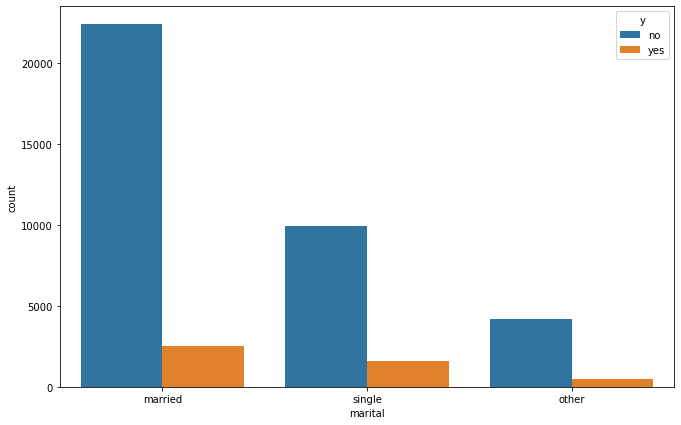

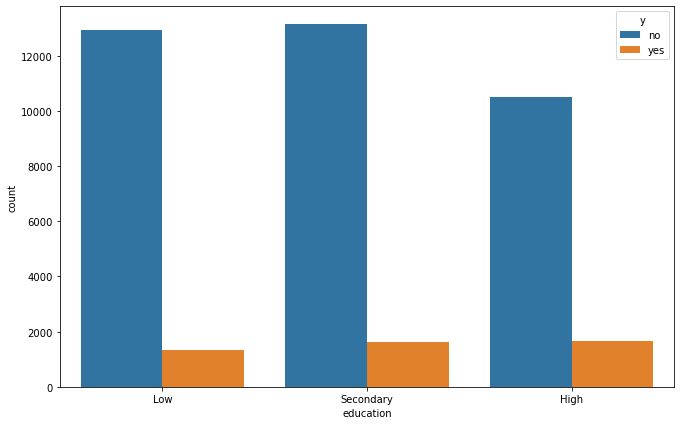

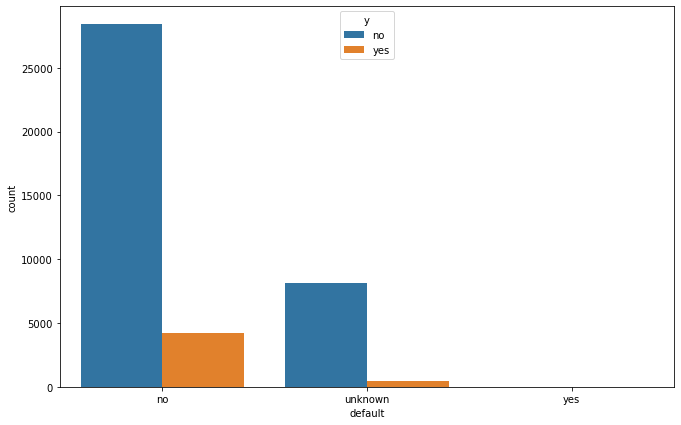

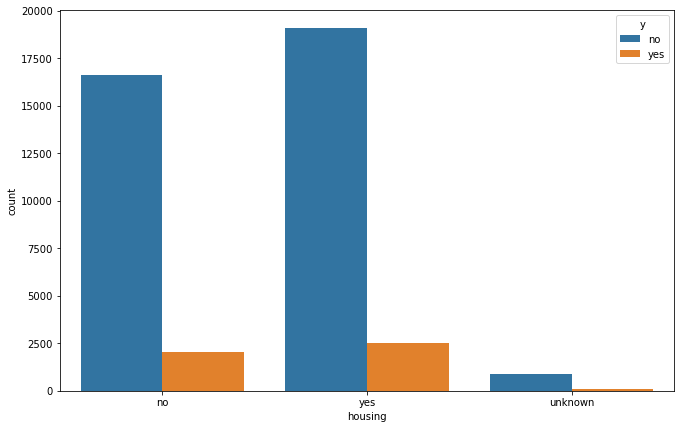

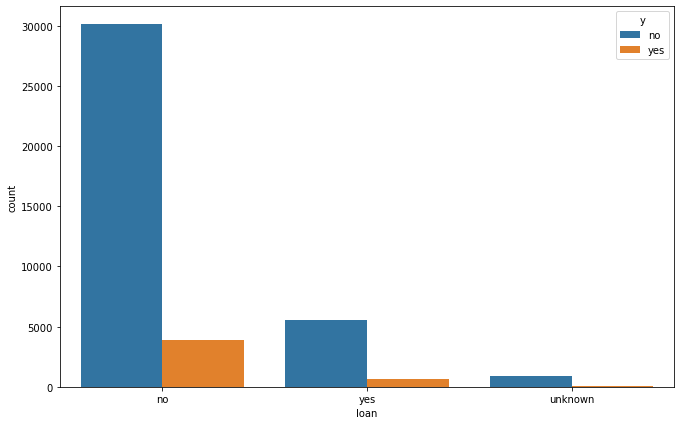

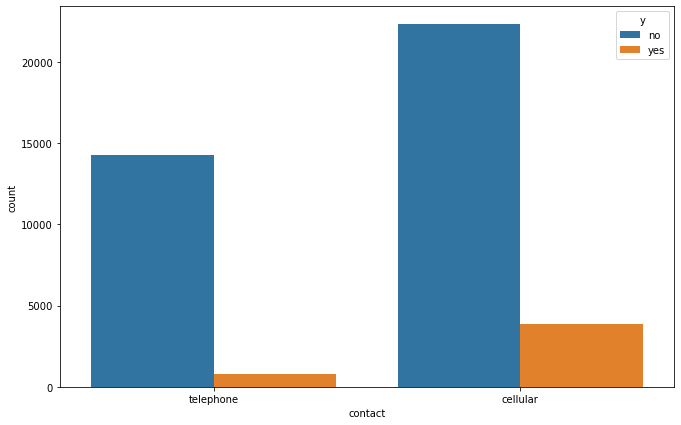

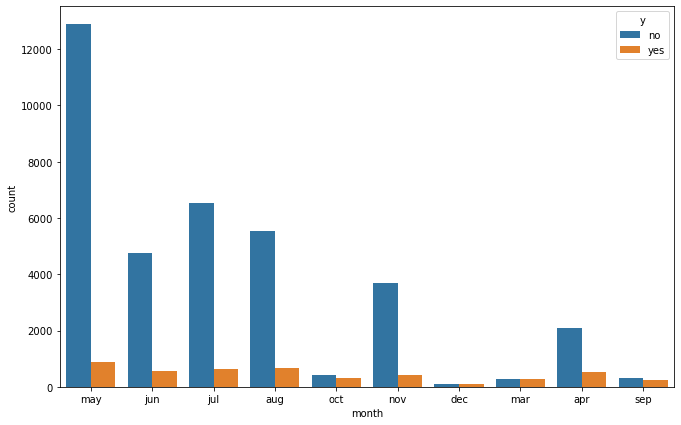

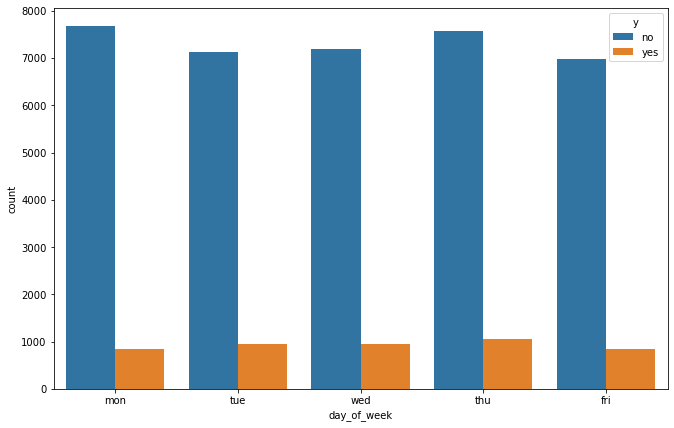

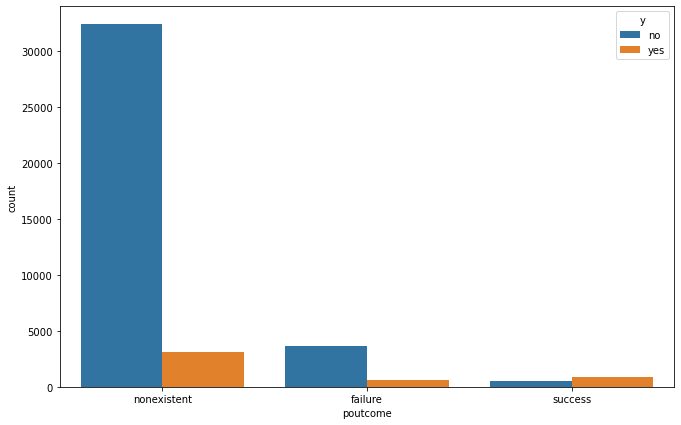

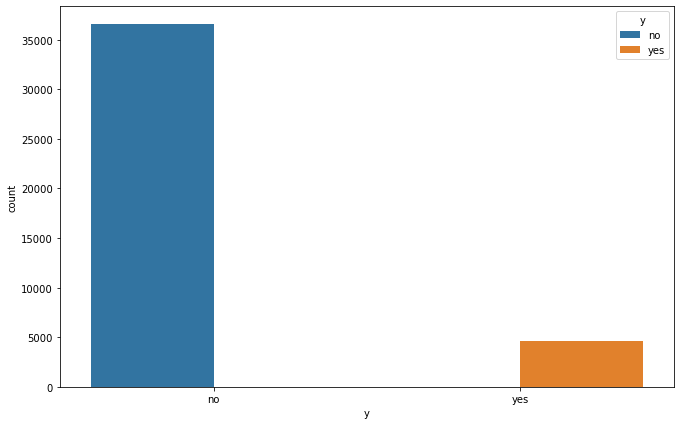

In [16]:
#we now vizualize categorical variables and the total claim amount
for columns in categoricals:
    plt.figure(figsize=(11,7))
    sns.countplot(data=df, x=categoricals[columns], hue=df['y'])
    plt.show()

## 3.4. Collinearity 

### 3.4.1. Bivariate Analysis

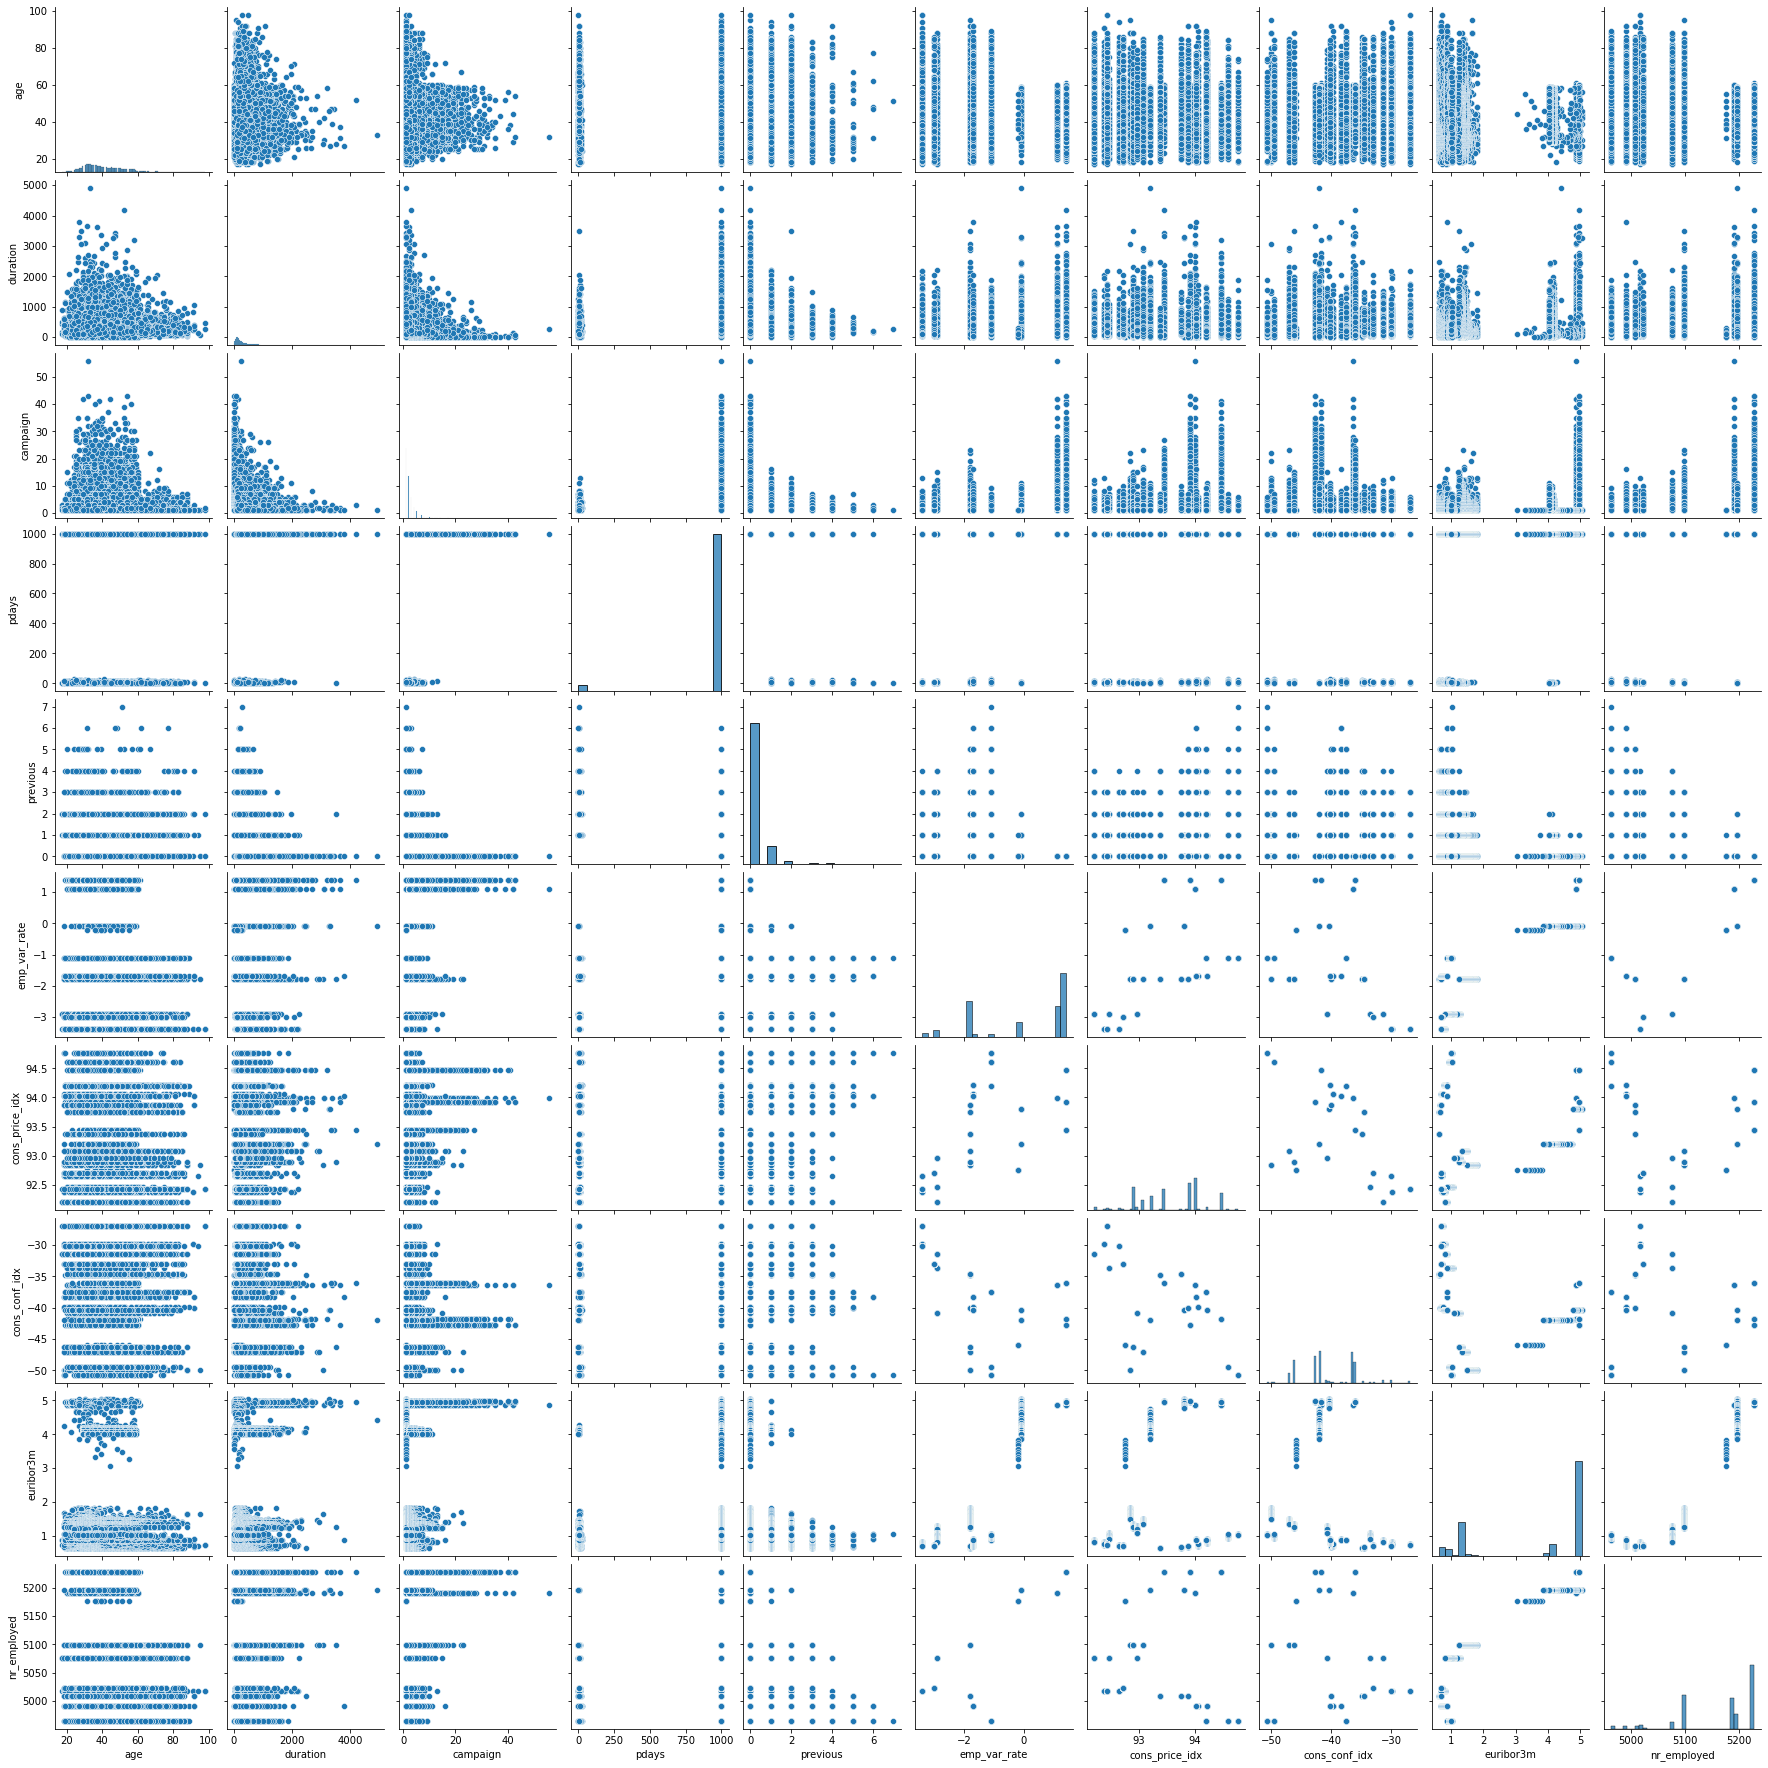

In [19]:
sns.pairplot(continuous_variables)

In [20]:
# we do not observe a linear relation between variables

### 3.4.2. Correlation Matrix

In [17]:
# using a spearman's rank correlation since we observed no linear relationship for our data
correlation = df.corr(method='spearman')
correlation

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
age,1.000000,-0.002123,0.005715,-0.001062,-0.012643,0.045003,0.044790,0.114536,0.054391,0.044789
duration,-0.002123,1.000000,-0.080953,-0.083072,0.042407,-0.069201,0.002854,-0.008678,-0.078346,-0.095225
campaign,0.005715,-0.080953,1.000000,0.055514,-0.087420,0.156360,0.096494,-0.001554,0.140512,0.144264
pdays,-0.001062,-0.083072,0.055514,1.000000,-0.509583,0.227698,0.056763,-0.077265,0.278488,0.290673
previous,-0.012643,0.042407,-0.087420,-0.509583,1.000000,-0.435293,-0.282720,-0.115967,-0.454724,-0.438721
emp_var_rate,0.045003,-0.069201,0.156360,0.227698,-0.435293,1.000000,0.664890,0.224693,0.939915,0.944702
cons_price_idx,0.044790,0.002854,0.096494,0.056763,-0.282720,0.664890,1.000000,0.245633,0.490970,0.464738
cons_conf_idx,0.114536,-0.008678,-0.001554,-0.077265,-0.115967,0.224693,0.245633,1.000000,0.236646,0.132707
euribor3m,0.054391,-0.078346,0.140512,0.278488,-0.454724,0.939915,0.490970,0.236646,1.000000,0.928857
nr_employed,0.044789,-0.095225,0.144264,0.290673,-0.438721,0.944702,0.464738,0.132707,0.928857,1.000000


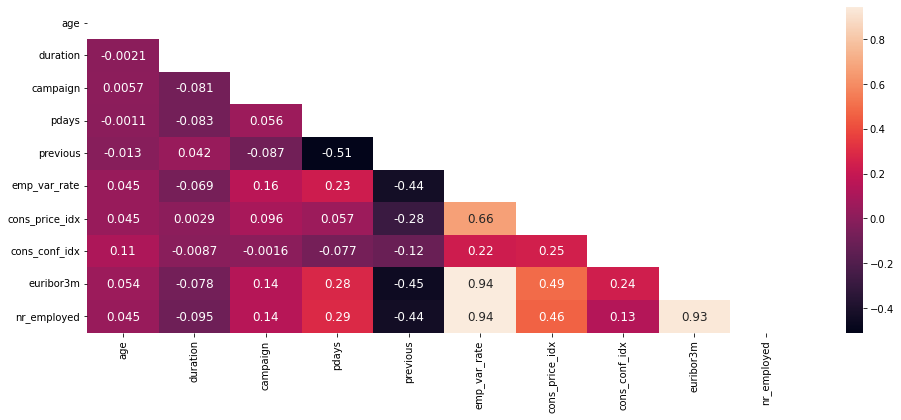

In [18]:
#now let's use a heatmap to vizualize this
mask = np.zeros_like(df.corr(method='spearman'))
triangle = np.triu_indices_from(mask)
mask[triangle] = True

plt.figure(figsize=(16,6))
sns.heatmap(df.corr(method='spearman'), annot=True, annot_kws={"size":12}, mask=mask)
plt.show()

**Comment:** We have the following interesting observations:
1. Number of employees is unsuprisingly highly correlated employment variation rate. 
2. euribor 3 months rate is also very highly correlated with number of employees and employment variation rate. 
3. Employment variation rate is also relatively correlated to the consumer price index variable.

## 3.5. Checking for Outliers

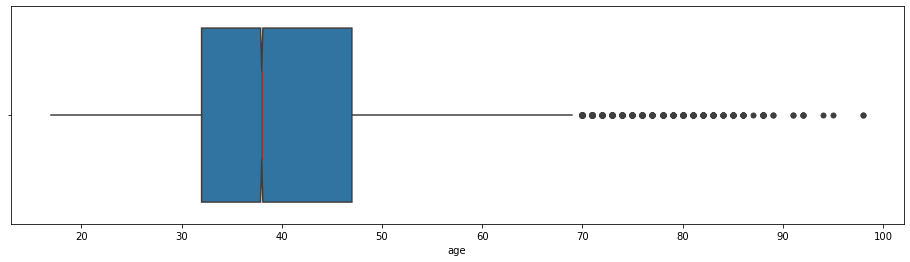

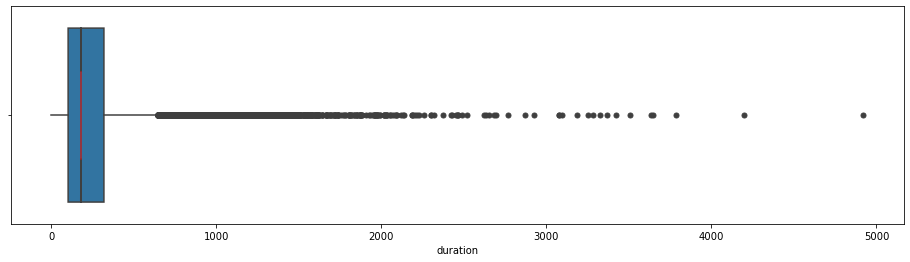

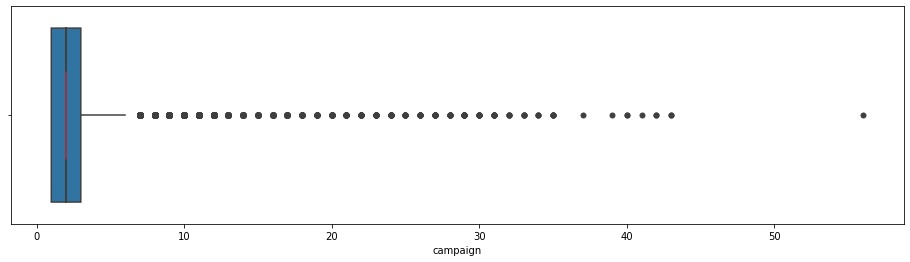

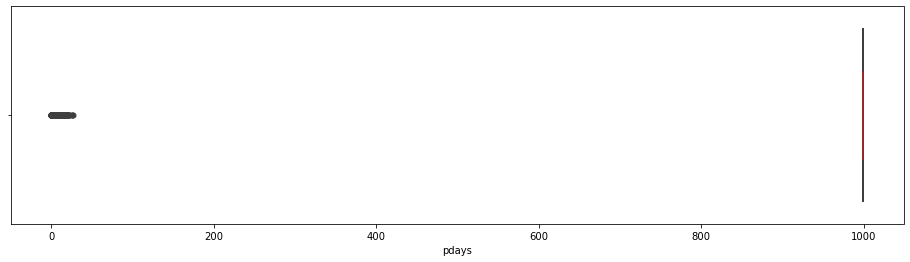

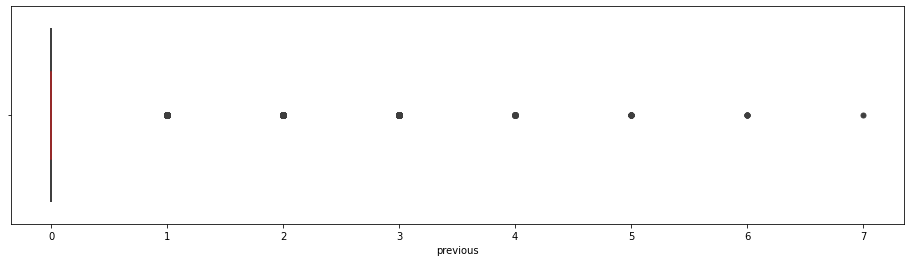

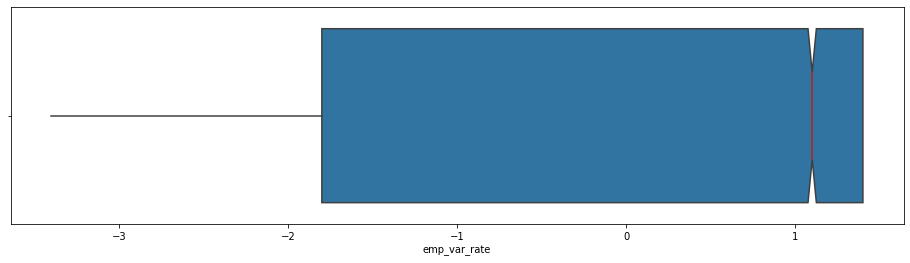

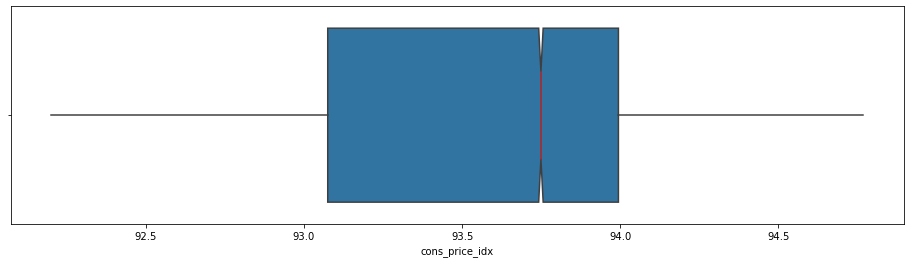

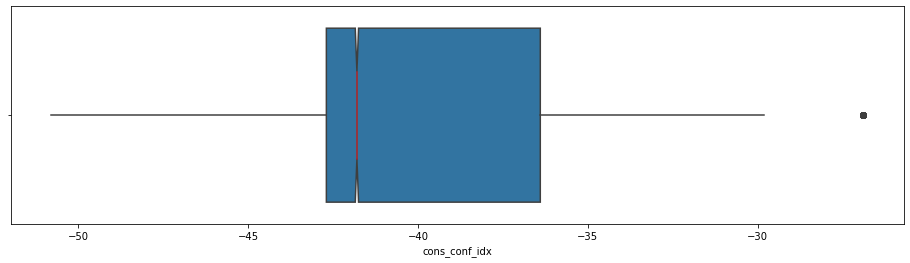

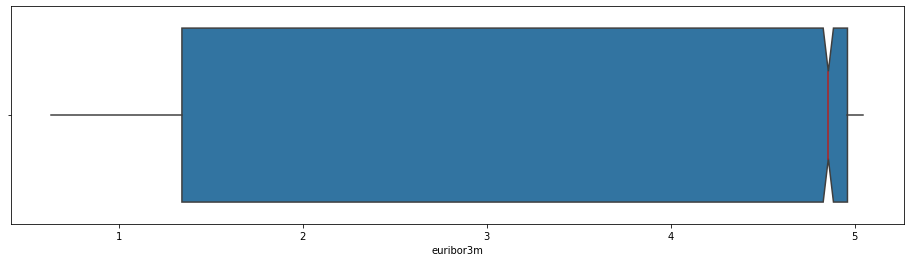

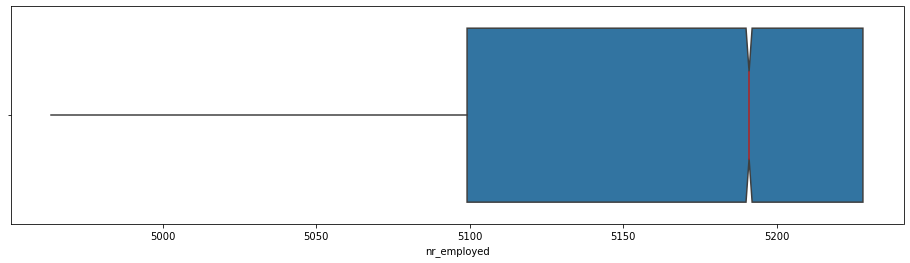

In [19]:
#checking for outliers
for variables in continuous_variables:
    plt.figure(figsize=(16,4))
    sns.boxplot(data=df, x=df[variables],
                notch=True, showcaps=False,
                flierprops={"marker": "o"},
                medianprops={"color": "firebrick"})
    plt.show()

**Comment:** We originally left outliers untouched to see what our models will give us. After a relative poor performance we came back in order to remove outliers. Our goal is to see how a df with no outliers is going to affect our existing models.

Just as a note: df refers to the original dataset, clean_df refers to the dataset with no outliers.

### 3.5.1. Removing Outliers

In [20]:
df_clean = df.copy(deep=True) #copying the original df 

In [21]:
columns_with_outliers = df_clean[['age', 'campaign', 'pdays', 'previous', 'cons_conf_idx']]
columns_with_outliers

,age,campaign,pdays,previous,cons_conf_idx
0,56,1,999,0,-36.4
1,57,1,999,0,-36.4
2,37,1,999,0,-36.4
3,40,1,999,0,-36.4
4,56,1,999,0,-36.4
...,...,...,...,...,...
41183,73,1,999,0,-50.8
41184,46,1,999,0,-50.8
41185,56,2,999,0,-50.8
41186,44,1,999,0,-50.8


In [22]:
def outliers_null_replace(columns):
    for x in columns:
        q75,q25 = np.percentile(df_clean.loc[:,x],[75,25])
        intr_qr = q75-q25
        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
        df_clean.loc[df[x] < min,x] = np.nan
        df_clean.loc[df[x] > max,x] = np.nan
#this function calculates Q1 and Q3, detects outliers and replaces with null for the columns assigned.

In [23]:
outliers_null_replace(columns_with_outliers) #applying the function

df_clean.isnull().sum() #checking for replaced outliers

age                469
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign          2406
pdays             1515
previous          5625
poutcome             0
emp_var_rate         0
cons_price_idx       0
cons_conf_idx      447
euribor3m            0
nr_employed          0
y                    0
dtype: int64

In [24]:
df_clean = df_clean.dropna(axis = 0) #and now we get rid of our outliers.
df_clean.isnull().sum() #sanity check

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [25]:
df_clean = df_clean.reset_index(drop=True)
df_clean #resetting the index. without it we'll start getting nans in preprocessing

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56.0,housemaid,married,Low,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,Secondary,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,Secondary,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,Low,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,Secondary,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32760,36.0,admin.,married,High,no,no,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
32761,37.0,admin.,married,High,no,yes,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
32762,46.0,blue-collar,married,Secondary,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
32763,56.0,retired,married,High,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


## 3.6. Feature Selection 

In [26]:
df = df.drop('duration', axis=1)
df_clean = df_clean.drop('duration', axis=1)
#we drop feature duration as the dataset suggests that it should not be used for predictive modeling.
#For more see above in 1. Attribute Information

# 4. Preprocessing (df & df_clean)

In [28]:
# separation of X (explanatory variables) & y (target variable)
X = df.iloc[:, :-1]
y = df["y"]

X_clean = df_clean.iloc[:, :-1]
y_clean = df_clean["y"]

In [29]:
y_clean.shape

(32765,)

In [30]:
# choosing categroical and numerical X variables.
X_cat = X.select_dtypes(exclude='number')
X_num = X.select_dtypes(include='number')

X_clean_cat = X_clean.select_dtypes(exclude='number')
X_clean_num = X_clean.select_dtypes(include='number')

## 4.1. Encoding Categorical Features

In [31]:
# One hot encoding
from sklearn.preprocessing import OneHotEncoder

In [32]:
#function to encode categorical variable from different df and create the final X
def encoding_categoricals(X_categorical, X_numerical):
    encoder = OneHotEncoder(handle_unknown='error', drop='first')
    
    encoder.fit(X_categorical)
    
    encoded = encoder.transform(X_categorical).toarray() # extracting the encoded array from the encoder
    
    cat_one_hot_encoder = pd.DataFrame(encoded) # transforming the numpy array to a Pandas dataframe
    
    cat_one_hot_encoder.columns = encoder.get_feature_names_out() # adding column names to the dataframe
    
    X_encoded = pd.concat([X_numerical, cat_one_hot_encoder], axis=1) # concatenating X_num and X_cat
    
    return X_encoded

In [33]:
#checking if the function works
encoding_categoricals(X_cat, X_num)

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
# finalizing the encoded Xs
X_encoded = encoding_categoricals(X_cat, X_num)
X_clean_encoded = encoding_categoricals(X_clean_cat, X_clean_num)

### 4.1.1. Encoding Target Variable

In [35]:
# encoding target variable (will be useful for class weights later too)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y_clean = label_encoder.fit_transform(y_clean)

## 4.2. Train / Test Split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train_og, X_test_og, y_train_og, y_test_og = train_test_split(X_encoded, y, test_size=0.2, random_state=0)
print("Number of rows X_train = {}".format(len(X_train_og)))
print("Number of rows X_test = {}".format(len(X_test_og)))
print("Number of rows y_train = {}".format(len(y_train_og)))
print("Number of rows y_test = {}".format(len(y_test_og)))
print("Percentage of train values = {}".format(round(len(X_train_og)/len(X_encoded), 4) * 100),"%")

Number of rows X_train = 32950
Number of rows X_test = 8238
Number of rows y_train = 32950
Number of rows y_test = 8238
Percentage of train values = 80.0 %


In [38]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean_encoded, y_clean, test_size=0.2, random_state=0)
print("Number of rows X_train = {}".format(len(X_train_clean)))
print("Number of rows X_test = {}".format(len(X_test_clean)))
print("Number of rows y_train = {}".format(len(y_train_clean)))
print("Number of rows y_test = {}".format(len(y_test_clean)))
print("Percentage of train values = {}".format(round(len(X_train_clean)/len(X_clean_encoded), 4) * 100),"%")

Number of rows X_train = 26212
Number of rows X_test = 6553
Number of rows y_train = 26212
Number of rows y_test = 6553
Percentage of train values = 80.0 %


## 4.3. Random Forests

## 4.3.1. Random Forest for Feature Importance (Original Data)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
classifier = RandomForestClassifier(n_estimators = 150, min_samples_split=30)
classifier.fit(X_train_og, y_train_og)

print("Train Score : {}".format(classifier.score(X_train_og, y_train_og)))
print('Test Score : {}'.format(classifier.score(X_test_og, y_test_og)))

Train Score : 0.914081942336874
Test Score : 0.9013109978150037


In [41]:
classifier.feature_importances_
#sanity check

array([8.37641376e-02, 3.64177404e-02, 9.11090178e-02, 2.05205449e-02,
       5.98875337e-02, 4.74582136e-02, 5.50096195e-02, 1.48705039e-01,
       1.32373934e-01, 9.30552759e-03, 5.98671557e-03, 5.47170957e-03,
       7.17178309e-03, 7.94029071e-03, 6.33081860e-03, 7.11178353e-03,
       7.01294764e-03, 9.75265576e-03, 6.60554427e-03, 8.10295581e-03,
       9.73785969e-03, 8.72506428e-03, 9.25759209e-03, 8.61499219e-03,
       1.70015320e-07, 3.39149568e-03, 9.89059749e-03, 3.46272850e-03,
       9.58765604e-03, 1.91519056e-02, 2.21112899e-03, 1.21466115e-03,
       2.72666663e-03, 3.67132179e-03, 1.01456498e-02, 1.08049519e-02,
       2.62901540e-03, 1.34987301e-02, 2.93473378e-03, 1.06768382e-02,
       9.28785706e-03, 9.53454968e-03, 9.09718805e-03, 1.41298143e-02,
       5.95783191e-02])

In [42]:
pred_train_og = classifier.predict(X_train_og)
pred_test_og = classifier.predict(X_test_og)
print(classification_report(y_train_og, pred_train_og))
print(classification_report(y_test_og, pred_test_og))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     29229
           1       0.79      0.32      0.46      3721

    accuracy                           0.91     32950
   macro avg       0.86      0.66      0.71     32950
weighted avg       0.91      0.91      0.90     32950

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7319
           1       0.65      0.25      0.36       919

    accuracy                           0.90      8238
   macro avg       0.78      0.62      0.66      8238
weighted avg       0.88      0.90      0.88      8238



In [ ]:
# from the above classification report we can infer that our model is learning our NO's better than our YES's
#that is not a suprise because of the natural imbalance of this dataset's y variable.

In [43]:
# we'll apply class weights to account for the imnbalance between YES's and NO's
32950/29229 # weight for class 0

1.1273050737281467

In [44]:
32950/3721 # weight for class 1

8.855146466003763

In [46]:
#trying the random forest again but with class weights balanced

weights = {0:1, 1:9}

classifier = RandomForestClassifier(n_estimators = 150, min_samples_split=30, class_weight=weights)
classifier.fit(X_train_og, y_train_og)

pred_train_og = classifier.predict(X_train_og)
pred_test_og = classifier.predict(X_test_og)
print(classification_report(y_train_og, pred_train_og))
print(classification_report(y_test_og, pred_test_og))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93     29229
           1       0.48      0.73      0.58      3721

    accuracy                           0.88     32950
   macro avg       0.72      0.82      0.76     32950
weighted avg       0.91      0.88      0.89     32950

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      7319
           1       0.43      0.60      0.50       919

    accuracy                           0.87      8238
   macro avg       0.69      0.75      0.71      8238
weighted avg       0.89      0.87      0.88      8238



In [ ]:
# our model now identifies a good proportion of actual positives (recall), but the proportion of positive identification 
# that was actually correct is low for the YES's (precision)

In [47]:
# Feature importance 
feature_importance = pd.DataFrame({"Features":X_encoded.columns,
                                    "Value": classifier.feature_importances_})

feature_importance.sort_values(["Value"], ascending=False)

,Features,Value
7,euribor3m,0.155049
8,nr_employed,0.117159
0,age,0.101387
4,emp_var_rate,0.094187
1,campaign,0.057114
6,cons_conf_idx,0.048045
5,cons_price_idx,0.032280
2,pdays,0.028529
44,poutcome_success,0.022636
29,contact_telephone,0.021038


**Note About Gini Index:** Gini Index, also known as Gini impurity, calculates the amount of probability of a specific feature that is classified incorrectly when selected randomly. If all the elements are linked with a single class then it can be called pure.

In [48]:
#creating a new X with the important features as defined by our random tree. 
#We (with Andre's guidance) defined most important features as features having scores only to the power of one and two - not below that.
X_important = X_encoded[['euribor3m', 'nr_employed', 'age', 'emp_var_rate', 'campaign', 'cons_conf_idx', 'cons_price_idx', 'pdays', 'poutcome_success', 
 'contact_telephone', 'month_may', 'default_unknown', 'housing_yes', 'poutcome_nonexistent', 'previous', 'job_blue-collar', 
 'marital_single', 'loan_yes', 'education_Secondary', 'education_Low', 'day_of_week_mon', 'job_technician', 'day_of_week_thu',
 'day_of_week_wed', 'marital_other', 'day_of_week_tue', 'job_services']]
X_important #sanity check
#I wanted to write a function for this but ran out of time.

,euribor3m,nr_employed,age,emp_var_rate,campaign,cons_conf_idx,cons_price_idx,pdays,poutcome_success,contact_telephone,...,loan_yes,education_Secondary,education_Low,day_of_week_mon,job_technician,day_of_week_thu,day_of_week_wed,marital_other,day_of_week_tue,job_services
0,4.857,5191.0,56,1.1,1,-36.4,93.994,999,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.857,5191.0,57,1.1,1,-36.4,93.994,999,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4.857,5191.0,37,1.1,1,-36.4,93.994,999,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.857,5191.0,40,1.1,1,-36.4,93.994,999,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.857,5191.0,56,1.1,1,-36.4,93.994,999,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1.028,4963.6,73,-1.1,1,-50.8,94.767,999,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41184,1.028,4963.6,46,-1.1,1,-50.8,94.767,999,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41185,1.028,4963.6,56,-1.1,2,-50.8,94.767,999,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41186,1.028,4963.6,44,-1.1,1,-50.8,94.767,999,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## 4.3.2. Random Forest for Feature Importance (Clean Data)

In [49]:
classifier = RandomForestClassifier(n_estimators = 150, min_samples_split=30)
classifier.fit(X_train_clean, y_train_clean)

print("Train Score : {}".format(classifier.score(X_train_clean, y_train_clean)))
print('Test Score : {}'.format(classifier.score(X_test_clean, y_test_clean)))

Train Score : 0.9237753700595147
Test Score : 0.9151533648710515


In [50]:
pred_train_clean = classifier.predict(X_train_clean)
pred_test_clean = classifier.predict(X_test_clean)
print(classification_report(y_train_clean, pred_train_clean))
print(classification_report(y_test_clean, pred_test_clean))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     23928
           1       0.81      0.16      0.27      2284

    accuracy                           0.92     26212
   macro avg       0.87      0.58      0.62     26212
weighted avg       0.92      0.92      0.90     26212

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      5991
           1       0.53      0.10      0.18       562

    accuracy                           0.92      6553
   macro avg       0.72      0.55      0.57      6553
weighted avg       0.89      0.92      0.89      6553



In [51]:
26212/23928 # weight for class 0

1.0954530257438984

In [52]:
26212/2284 # weight for class 11

11.476357267950963

In [53]:
#trying the random forest again but with class weights more balanced
# further increase the class weight of 1 has not produced particularly better results.

weights = {0:1, 1:11}

classifier = RandomForestClassifier(n_estimators = 150, min_samples_split=30, class_weight=weights)
classifier.fit(X_train_clean, y_train_clean)

pred_train_clean = classifier.predict(X_train_clean)
pred_test_clean = classifier.predict(X_test_clean)
print(classification_report(y_train_clean, pred_train_clean))
print(classification_report(y_test_clean, pred_test_clean))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94     23928
           1       0.46      0.71      0.56      2284

    accuracy                           0.90     26212
   macro avg       0.72      0.81      0.75     26212
weighted avg       0.93      0.90      0.91     26212

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      5991
           1       0.35      0.49      0.41       562

    accuracy                           0.88      6553
   macro avg       0.65      0.70      0.67      6553
weighted avg       0.90      0.88      0.89      6553



In [54]:
# Feature importance 
feature_importance_clean = pd.DataFrame({"Features":X_clean_encoded.columns,
                                    "Value": classifier.feature_importances_})

feature_importance_clean.sort_values(["Value"], ascending=False)

,Features,Value
7,euribor3m,0.158065
0,age,0.130769
8,nr_employed,0.084108
4,emp_var_rate,0.077327
1,campaign,0.063545
5,cons_price_idx,0.046493
29,contact_telephone,0.030433
6,cons_conf_idx,0.029871
23,default_unknown,0.025740
26,housing_yes,0.023419


In [55]:
#creating a new X_clean with the important features as defined by our random tree. 
#Just like before, we defined most important features as features having scores only to the power of one and two - not below that.
X_clean_important = X_clean_encoded[['euribor3m', 'nr_employed', 'age', 'emp_var_rate', 'campaign', 'cons_conf_idx', 'cons_price_idx',  
 'contact_telephone', 'month_may', 'default_unknown', 'housing_yes', 'job_blue-collar', 'marital_single', 'loan_yes', 'education_Secondary', 'education_Low', 
'day_of_week_mon', 'job_technician', 'day_of_week_thu','day_of_week_wed', 'marital_other', 'day_of_week_tue', 'job_services', 'job_management', 'job_entrepreneur']]
X_clean_important #sanity check

,euribor3m,nr_employed,age,emp_var_rate,campaign,cons_conf_idx,cons_price_idx,contact_telephone,month_may,default_unknown,...,education_Low,day_of_week_mon,job_technician,day_of_week_thu,day_of_week_wed,marital_other,day_of_week_tue,job_services,job_management,job_entrepreneur
0,4.857,5191.0,56.0,1.1,1.0,-36.4,93.994,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.857,5191.0,57.0,1.1,1.0,-36.4,93.994,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4.857,5191.0,37.0,1.1,1.0,-36.4,93.994,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.857,5191.0,40.0,1.1,1.0,-36.4,93.994,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.857,5191.0,56.0,1.1,1.0,-36.4,93.994,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32760,1.028,4963.6,36.0,-1.1,2.0,-50.8,94.767,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32761,1.028,4963.6,37.0,-1.1,1.0,-50.8,94.767,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32762,1.028,4963.6,46.0,-1.1,1.0,-50.8,94.767,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32763,1.028,4963.6,56.0,-1.1,2.0,-50.8,94.767,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 4.4. Train / Test Split with Important Features

In [59]:
X_train_og_important, X_test_og_important, y_train_og_important, y_test_og_important = train_test_split(X_important, y, test_size=0.2, random_state=0)
print("Number of rows X_train = {}".format(len(X_train_og_important)))
print("Number of rows X_test = {}".format(len(X_test_og_important)))
print("Number of rows y_train = {}".format(len(y_train_og_important)))
print("Number of rows y_test = {}".format(len(y_test_og_important)))
print("Percentage of train values = {}".format(round(len(X_train_og_important)/len(X_important), 4) * 100),"%")

Number of rows X_train = 32950
Number of rows X_test = 8238
Number of rows y_train = 32950
Number of rows y_test = 8238
Percentage of train values = 80.0 %


In [58]:
X_train_clean_important, X_test_clean_important, y_train_clean_important, y_test_clean_important = train_test_split(X_clean_important, y_clean, test_size=0.2, random_state=0)
print("Number of rows X_train = {}".format(len(X_train_clean_important)))
print("Number of rows X_test = {}".format(len(X_test_clean_important)))
print("Number of rows y_train = {}".format(len(y_train_clean_important)))
print("Number of rows y_test = {}".format(len(y_test_clean_important)))
print("Percentage of train values = {}".format(round(len(X_train_clean_important)/len(X_clean_important), 4) * 100),"%")

Number of rows X_train = 26212
Number of rows X_test = 6553
Number of rows y_train = 26212
Number of rows y_test = 6553
Percentage of train values = 80.0 %


<h3>Summary</h3> In order to avoid confusion we offer a summary of the various train/test splits we'll be using, before moving forward with modeling. 

1. X_train_og, X_test_og, y_train_og, y_test_og: 
    - It refers to the original train/test split. This includes all features with outliers.
2. X_train_clean, X_test_clean, y_train_clean, y_test_clean: 
    - This includes all features without any outliers.
3. X_train_og_important, X_test_og_important, y_train_og_important, y_test_og_important:
    - This includes only the important features with outliers
4. X_train_clean_important, X_test_clean_important, y_train_clean_important, y_test_clean_important:
    - This includes only the important features without any outliers.

# 5. Creating Predictive Models

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [61]:
#defining different scalers
scaler1 = StandardScaler()
scaler2 = MinMaxScaler()
scaler3 = PolynomialFeatures(degree=2, interaction_only=True)

In [62]:
#defining different models
weights = {0:1, 1:15} #adding more weights to the 1
baseline_classification = LogisticRegression(max_iter=500, class_weight=weights) #added custom weights and increased max iterations
knn = KNeighborsClassifier(n_neighbors=22) # we experimented with different n_neighbors
mlp = MLPClassifier(random_state=50, max_iter=500) #experimented with different random states and increased max iterations

In [63]:
def model_application_and_evaluation(df, scaler, model, X_train, X_test, y_train, y_test): 
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    classifier.fit(X_train,y_train)
    print("Train", classification_report(y_train, classifier.predict(X_train)))
    print("Test", classification_report(y_test, classifier.predict(X_test)))

## 5.1 Baseline Logistic Regression

### 5.1.1. Logistic Regression | Original Data

In [64]:
model_application_and_evaluation(df, scaler1, baseline_classification, X_train_og, X_test_og, y_train_og, y_test_og) 

Train               precision    recall  f1-score   support

           0       0.97      0.89      0.93     29229
           1       0.48      0.78      0.59      3721

    accuracy                           0.88     32950
   macro avg       0.72      0.84      0.76     32950
weighted avg       0.91      0.88      0.89     32950

Test               precision    recall  f1-score   support

           0       0.95      0.89      0.92      7319
           1       0.41      0.61      0.49       919

    accuracy                           0.86      8238
   macro avg       0.68      0.75      0.70      8238
weighted avg       0.89      0.86      0.87      8238



In [65]:
model_application_and_evaluation(df, scaler2, baseline_classification, X_train_og, X_test_og, y_train_og, y_test_og)

Train               precision    recall  f1-score   support

           0       0.97      0.89      0.93     29229
           1       0.48      0.78      0.59      3721

    accuracy                           0.88     32950
   macro avg       0.72      0.84      0.76     32950
weighted avg       0.91      0.88      0.89     32950

Test               precision    recall  f1-score   support

           0       0.95      0.89      0.92      7319
           1       0.41      0.61      0.49       919

    accuracy                           0.86      8238
   macro avg       0.68      0.75      0.70      8238
weighted avg       0.89      0.86      0.87      8238



In [66]:
model_application_and_evaluation(df, scaler3, baseline_classification, X_train_og, X_test_og, y_train_og, y_test_og)

Train               precision    recall  f1-score   support

           0       0.98      0.94      0.96     29229
           1       0.63      0.85      0.72      3721

    accuracy                           0.93     32950
   macro avg       0.80      0.89      0.84     32950
weighted avg       0.94      0.93      0.93     32950

Test               precision    recall  f1-score   support

           0       0.94      0.92      0.93      7319
           1       0.45      0.52      0.48       919

    accuracy                           0.88      8238
   macro avg       0.69      0.72      0.71      8238
weighted avg       0.88      0.88      0.88      8238



### 5.1.2. Logistic Regression | Clean Data

In [67]:
model_application_and_evaluation(df_clean, scaler1, baseline_classification, X_train_clean, X_test_clean, y_train_clean, y_test_clean)

Train               precision    recall  f1-score   support

           0       0.97      0.92      0.95     23928
           1       0.47      0.72      0.56      2284

    accuracy                           0.90     26212
   macro avg       0.72      0.82      0.76     26212
weighted avg       0.93      0.90      0.91     26212

Test               precision    recall  f1-score   support

           0       0.95      0.91      0.93      5991
           1       0.35      0.49      0.41       562

    accuracy                           0.88      6553
   macro avg       0.65      0.70      0.67      6553
weighted avg       0.90      0.88      0.89      6553



In [68]:
model_application_and_evaluation(df_clean, scaler2, baseline_classification, X_train_clean, X_test_clean, y_train_clean, y_test_clean)

Train               precision    recall  f1-score   support

           0       0.97      0.92      0.95     23928
           1       0.46      0.71      0.56      2284

    accuracy                           0.90     26212
   macro avg       0.72      0.82      0.75     26212
weighted avg       0.93      0.90      0.91     26212

Test               precision    recall  f1-score   support

           0       0.95      0.91      0.93      5991
           1       0.34      0.49      0.41       562

    accuracy                           0.88      6553
   macro avg       0.65      0.70      0.67      6553
weighted avg       0.90      0.88      0.89      6553



In [69]:
model_application_and_evaluation(df_clean, scaler3, baseline_classification, X_train_clean, X_test_clean, y_train_clean, y_test_clean)

Train               precision    recall  f1-score   support

           0       0.98      0.95      0.96     23928
           1       0.60      0.79      0.68      2284

    accuracy                           0.94     26212
   macro avg       0.79      0.87      0.82     26212
weighted avg       0.95      0.94      0.94     26212

Test               precision    recall  f1-score   support

           0       0.95      0.94      0.94      5991
           1       0.39      0.42      0.40       562

    accuracy                           0.89      6553
   macro avg       0.67      0.68      0.67      6553
weighted avg       0.90      0.89      0.89      6553



### 5.1.3. Logistic Regression | Important Features for Original Data

In [70]:
model_application_and_evaluation(df, scaler1, baseline_classification, X_train_og_important, X_test_og_important, y_train_og_important, y_test_og_important)

Train               precision    recall  f1-score   support

           0       0.97      0.89      0.93     29229
           1       0.47      0.78      0.59      3721

    accuracy                           0.88     32950
   macro avg       0.72      0.84      0.76     32950
weighted avg       0.91      0.88      0.89     32950

Test               precision    recall  f1-score   support

           0       0.95      0.89      0.92      7319
           1       0.41      0.61      0.49       919

    accuracy                           0.86      8238
   macro avg       0.68      0.75      0.70      8238
weighted avg       0.89      0.86      0.87      8238



In [71]:
model_application_and_evaluation(df, scaler2, baseline_classification, X_train_og_important, X_test_og_important, y_train_og_important, y_test_og_important)

Train               precision    recall  f1-score   support

           0       0.97      0.89      0.93     29229
           1       0.47      0.78      0.59      3721

    accuracy                           0.87     32950
   macro avg       0.72      0.83      0.76     32950
weighted avg       0.91      0.87      0.89     32950

Test               precision    recall  f1-score   support

           0       0.95      0.89      0.92      7319
           1       0.41      0.61      0.49       919

    accuracy                           0.86      8238
   macro avg       0.68      0.75      0.70      8238
weighted avg       0.89      0.86      0.87      8238



In [72]:
model_application_and_evaluation(df, scaler3, baseline_classification, X_train_og_important, X_test_og_important, y_train_og_important, y_test_og_important)

Train               precision    recall  f1-score   support

           0       0.98      0.93      0.95     29229
           1       0.60      0.84      0.70      3721

    accuracy                           0.92     32950
   macro avg       0.79      0.89      0.83     32950
weighted avg       0.94      0.92      0.92     32950

Test               precision    recall  f1-score   support

           0       0.94      0.91      0.93      7319
           1       0.44      0.54      0.48       919

    accuracy                           0.87      8238
   macro avg       0.69      0.73      0.70      8238
weighted avg       0.88      0.87      0.88      8238



### 5.1.4. Logistic Regression | Important Features for Clean Data

In [73]:
model_application_and_evaluation(df_clean, scaler1, baseline_classification, X_train_clean_important, X_test_clean_important, y_train_clean_important, y_test_clean_important)

Train               precision    recall  f1-score   support

           0       0.97      0.92      0.95     23928
           1       0.46      0.71      0.56      2284

    accuracy                           0.90     26212
   macro avg       0.72      0.82      0.75     26212
weighted avg       0.93      0.90      0.91     26212

Test               precision    recall  f1-score   support

           0       0.95      0.91      0.93      5991
           1       0.35      0.50      0.41       562

    accuracy                           0.88      6553
   macro avg       0.65      0.71      0.67      6553
weighted avg       0.90      0.88      0.89      6553



In [74]:
model_application_and_evaluation(df_clean, scaler2, baseline_classification, X_train_clean_important, X_test_clean_important, y_train_clean_important, y_test_clean_important)

Train               precision    recall  f1-score   support

           0       0.97      0.92      0.95     23928
           1       0.46      0.71      0.56      2284

    accuracy                           0.90     26212
   macro avg       0.72      0.82      0.75     26212
weighted avg       0.93      0.90      0.91     26212

Test               precision    recall  f1-score   support

           0       0.95      0.91      0.93      5991
           1       0.35      0.50      0.41       562

    accuracy                           0.88      6553
   macro avg       0.65      0.71      0.67      6553
weighted avg       0.90      0.88      0.89      6553



In [75]:
model_application_and_evaluation(df_clean, scaler3, baseline_classification, X_train_clean_important, X_test_clean_important, y_train_clean_important, y_test_clean_important)

Train               precision    recall  f1-score   support

           0       0.98      0.95      0.96     23928
           1       0.59      0.80      0.68      2284

    accuracy                           0.93     26212
   macro avg       0.79      0.87      0.82     26212
weighted avg       0.95      0.93      0.94     26212

Test               precision    recall  f1-score   support

           0       0.95      0.93      0.94      5991
           1       0.38      0.44      0.41       562

    accuracy                           0.89      6553
   macro avg       0.67      0.69      0.68      6553
weighted avg       0.90      0.89      0.89      6553



## 5.2 KNeighbors Classifier Application & Evaluation

In [ ]:
#ideally we would like to build a function to detect the best score for KNN's n but we didn't have time for that.

### 5.2.1. KNN | Original Data

In [76]:
model_application_and_evaluation(df, scaler1, knn, X_train_og, X_test_og, y_train_og, y_test_og) 

Train               precision    recall  f1-score   support

           0       0.97      0.89      0.93     29229
           1       0.48      0.78      0.59      3721

    accuracy                           0.88     32950
   macro avg       0.72      0.84      0.76     32950
weighted avg       0.91      0.88      0.89     32950

Test               precision    recall  f1-score   support

           0       0.95      0.89      0.92      7319
           1       0.41      0.61      0.49       919

    accuracy                           0.86      8238
   macro avg       0.68      0.75      0.70      8238
weighted avg       0.89      0.86      0.87      8238



In [77]:
model_application_and_evaluation(df, scaler2, knn, X_train_og, X_test_og, y_train_og, y_test_og) 

Train               precision    recall  f1-score   support

           0       0.97      0.89      0.93     29229
           1       0.48      0.79      0.59      3721

    accuracy                           0.88     32950
   macro avg       0.72      0.84      0.76     32950
weighted avg       0.91      0.88      0.89     32950

Test               precision    recall  f1-score   support

           0       0.95      0.89      0.92      7319
           1       0.41      0.61      0.49       919

    accuracy                           0.86      8238
   macro avg       0.68      0.75      0.70      8238
weighted avg       0.89      0.86      0.87      8238



In [78]:
model_application_and_evaluation(df, scaler3, knn, X_train_og, X_test_og, y_train_og, y_test_og) 

Train               precision    recall  f1-score   support

           0       0.98      0.94      0.96     29229
           1       0.63      0.85      0.72      3721

    accuracy                           0.93     32950
   macro avg       0.80      0.89      0.84     32950
weighted avg       0.94      0.93      0.93     32950

Test               precision    recall  f1-score   support

           0       0.94      0.92      0.93      7319
           1       0.44      0.53      0.48       919

    accuracy                           0.87      8238
   macro avg       0.69      0.72      0.71      8238
weighted avg       0.88      0.87      0.88      8238



### 5.2.2. KNN | Clean Data

In [79]:
model_application_and_evaluation(df_clean, scaler1, knn, X_train_clean, X_test_clean, y_train_clean, y_test_clean)

Train               precision    recall  f1-score   support

           0       0.97      0.92      0.95     23928
           1       0.46      0.72      0.56      2284

    accuracy                           0.90     26212
   macro avg       0.72      0.82      0.75     26212
weighted avg       0.93      0.90      0.91     26212

Test               precision    recall  f1-score   support

           0       0.95      0.91      0.93      5991
           1       0.35      0.50      0.41       562

    accuracy                           0.88      6553
   macro avg       0.65      0.70      0.67      6553
weighted avg       0.90      0.88      0.89      6553



In [80]:
model_application_and_evaluation(df_clean, scaler2, knn, X_train_clean, X_test_clean, y_train_clean, y_test_clean)

Train               precision    recall  f1-score   support

           0       0.97      0.92      0.95     23928
           1       0.46      0.71      0.56      2284

    accuracy                           0.90     26212
   macro avg       0.72      0.81      0.75     26212
weighted avg       0.93      0.90      0.91     26212

Test               precision    recall  f1-score   support

           0       0.95      0.91      0.93      5991
           1       0.35      0.49      0.41       562

    accuracy                           0.88      6553
   macro avg       0.65      0.70      0.67      6553
weighted avg       0.90      0.88      0.89      6553



In [81]:
model_application_and_evaluation(df_clean, scaler3, knn, X_train_clean, X_test_clean, y_train_clean, y_test_clean)

Train               precision    recall  f1-score   support

           0       0.98      0.95      0.96     23928
           1       0.60      0.80      0.68      2284

    accuracy                           0.94     26212
   macro avg       0.79      0.87      0.82     26212
weighted avg       0.95      0.94      0.94     26212

Test               precision    recall  f1-score   support

           0       0.95      0.94      0.94      5991
           1       0.39      0.43      0.41       562

    accuracy                           0.89      6553
   macro avg       0.67      0.68      0.67      6553
weighted avg       0.90      0.89      0.90      6553



### 5.2.3. KNN | Important Features for Original Data

In [82]:
model_application_and_evaluation(df, scaler1, knn, X_train_og_important, X_test_og_important, y_train_og_important, y_test_og_important)

Train               precision    recall  f1-score   support

           0       0.97      0.89      0.93     29229
           1       0.47      0.78      0.58      3721

    accuracy                           0.87     32950
   macro avg       0.72      0.83      0.76     32950
weighted avg       0.91      0.87      0.89     32950

Test               precision    recall  f1-score   support

           0       0.95      0.89      0.92      7319
           1       0.41      0.61      0.49       919

    accuracy                           0.86      8238
   macro avg       0.68      0.75      0.70      8238
weighted avg       0.89      0.86      0.87      8238



In [83]:
model_application_and_evaluation(df, scaler2, knn, X_train_og_important, X_test_og_important, y_train_og_important, y_test_og_important)

Train               precision    recall  f1-score   support

           0       0.97      0.89      0.93     29229
           1       0.47      0.78      0.59      3721

    accuracy                           0.87     32950
   macro avg       0.72      0.84      0.76     32950
weighted avg       0.91      0.87      0.89     32950

Test               precision    recall  f1-score   support

           0       0.95      0.89      0.92      7319
           1       0.41      0.61      0.49       919

    accuracy                           0.86      8238
   macro avg       0.68      0.75      0.70      8238
weighted avg       0.89      0.86      0.87      8238



In [84]:
model_application_and_evaluation(df, scaler3, knn, X_train_og_important, X_test_og_important, y_train_og_important, y_test_og_important)

Train               precision    recall  f1-score   support

           0       0.98      0.93      0.95     29229
           1       0.59      0.85      0.70      3721

    accuracy                           0.92     32950
   macro avg       0.79      0.89      0.82     32950
weighted avg       0.94      0.92      0.92     32950

Test               precision    recall  f1-score   support

           0       0.94      0.91      0.93      7319
           1       0.45      0.55      0.49       919

    accuracy                           0.87      8238
   macro avg       0.69      0.73      0.71      8238
weighted avg       0.89      0.87      0.88      8238



### 5.2.4. KNN | Important Features for Clean Data

In [85]:
model_application_and_evaluation(df, scaler1, knn, X_train_clean_important, X_test_clean_important, y_train_clean_important, y_test_clean_important)

Train               precision    recall  f1-score   support

           0       0.97      0.92      0.95     23928
           1       0.46      0.71      0.56      2284

    accuracy                           0.90     26212
   macro avg       0.72      0.81      0.75     26212
weighted avg       0.93      0.90      0.91     26212

Test               precision    recall  f1-score   support

           0       0.95      0.91      0.93      5991
           1       0.35      0.50      0.41       562

    accuracy                           0.88      6553
   macro avg       0.65      0.71      0.67      6553
weighted avg       0.90      0.88      0.89      6553



In [86]:
model_application_and_evaluation(df, scaler2, knn, X_train_clean_important, X_test_clean_important, y_train_clean_important, y_test_clean_important)

Train               precision    recall  f1-score   support

           0       0.97      0.92      0.94     23928
           1       0.46      0.71      0.56      2284

    accuracy                           0.90     26212
   macro avg       0.71      0.81      0.75     26212
weighted avg       0.93      0.90      0.91     26212

Test               precision    recall  f1-score   support

           0       0.95      0.91      0.93      5991
           1       0.34      0.49      0.40       562

    accuracy                           0.87      6553
   macro avg       0.64      0.70      0.66      6553
weighted avg       0.90      0.87      0.88      6553



In [87]:
model_application_and_evaluation(df, scaler3, knn, X_train_clean_important, X_test_clean_important, y_train_clean_important, y_test_clean_important)

Train               precision    recall  f1-score   support

           0       0.98      0.95      0.96     23928
           1       0.58      0.79      0.67      2284

    accuracy                           0.93     26212
   macro avg       0.78      0.87      0.82     26212
weighted avg       0.94      0.93      0.94     26212

Test               precision    recall  f1-score   support

           0       0.95      0.93      0.94      5991
           1       0.39      0.44      0.41       562

    accuracy                           0.89      6553
   macro avg       0.67      0.69      0.68      6553
weighted avg       0.90      0.89      0.90      6553



## 5.3. MLP Classifier Application & Evaluation

### 5.3.1. MLP | Original Data

In [89]:
model_application_and_evaluation(df, scaler1, mlp, X_train_og, X_test_og, y_train_og, y_test_og)

Train               precision    recall  f1-score   support

           0       0.97      0.89      0.93     29229
           1       0.48      0.79      0.59      3721

    accuracy                           0.88     32950
   macro avg       0.72      0.84      0.76     32950
weighted avg       0.91      0.88      0.89     32950

Test               precision    recall  f1-score   support

           0       0.95      0.89      0.92      7319
           1       0.41      0.61      0.49       919

    accuracy                           0.86      8238
   macro avg       0.68      0.75      0.70      8238
weighted avg       0.89      0.86      0.87      8238



In [90]:
model_application_and_evaluation(df, scaler2, mlp, X_train_og, X_test_og, y_train_og, y_test_og)

Train               precision    recall  f1-score   support

           0       0.97      0.89      0.93     29229
           1       0.48      0.78      0.59      3721

    accuracy                           0.88     32950
   macro avg       0.72      0.84      0.76     32950
weighted avg       0.91      0.88      0.89     32950

Test               precision    recall  f1-score   support

           0       0.95      0.89      0.92      7319
           1       0.41      0.61      0.49       919

    accuracy                           0.86      8238
   macro avg       0.68      0.75      0.70      8238
weighted avg       0.89      0.86      0.87      8238



In [91]:
model_application_and_evaluation(df, scaler3, mlp, X_train_og, X_test_og, y_train_og, y_test_og)

Train               precision    recall  f1-score   support

           0       0.98      0.94      0.96     29229
           1       0.63      0.85      0.72      3721

    accuracy                           0.93     32950
   macro avg       0.80      0.89      0.84     32950
weighted avg       0.94      0.93      0.93     32950

Test               precision    recall  f1-score   support

           0       0.94      0.92      0.93      7319
           1       0.45      0.53      0.49       919

    accuracy                           0.88      8238
   macro avg       0.69      0.73      0.71      8238
weighted avg       0.89      0.88      0.88      8238



### 5.3.2. MLP | Clean Data

In [92]:
model_application_and_evaluation(df, scaler1, mlp, X_train_clean, X_test_clean, y_train_clean, y_test_clean)

Train               precision    recall  f1-score   support

           0       0.97      0.92      0.94     23928
           1       0.46      0.70      0.55      2284

    accuracy                           0.90     26212
   macro avg       0.71      0.81      0.75     26212
weighted avg       0.93      0.90      0.91     26212

Test               precision    recall  f1-score   support

           0       0.95      0.91      0.93      5991
           1       0.35      0.49      0.41       562

    accuracy                           0.88      6553
   macro avg       0.65      0.70      0.67      6553
weighted avg       0.90      0.88      0.89      6553



In [93]:
model_application_and_evaluation(df, scaler2, mlp, X_train_clean, X_test_clean, y_train_clean, y_test_clean)

Train               precision    recall  f1-score   support

           0       0.97      0.92      0.94     23928
           1       0.46      0.72      0.56      2284

    accuracy                           0.90     26212
   macro avg       0.72      0.82      0.75     26212
weighted avg       0.93      0.90      0.91     26212

Test               precision    recall  f1-score   support

           0       0.95      0.91      0.93      5991
           1       0.35      0.50      0.41       562

    accuracy                           0.88      6553
   macro avg       0.65      0.70      0.67      6553
weighted avg       0.90      0.88      0.89      6553



In [94]:
model_application_and_evaluation(df, scaler3, mlp, X_train_clean, X_test_clean, y_train_clean, y_test_clean)

Train               precision    recall  f1-score   support

           0       0.98      0.95      0.96     23928
           1       0.60      0.79      0.68      2284

    accuracy                           0.93     26212
   macro avg       0.79      0.87      0.82     26212
weighted avg       0.95      0.93      0.94     26212

Test               precision    recall  f1-score   support

           0       0.95      0.94      0.94      5991
           1       0.39      0.43      0.41       562

    accuracy                           0.89      6553
   macro avg       0.67      0.68      0.67      6553
weighted avg       0.90      0.89      0.90      6553



### 5.3.3. MLP | Important Features for Original Data

In [95]:
model_application_and_evaluation(df, scaler1, mlp, X_train_og_important, X_test_og_important, y_train_og_important, y_test_og_important)

Train               precision    recall  f1-score   support

           0       0.97      0.89      0.93     29229
           1       0.47      0.78      0.58      3721

    accuracy                           0.87     32950
   macro avg       0.72      0.83      0.76     32950
weighted avg       0.91      0.87      0.89     32950

Test               precision    recall  f1-score   support

           0       0.95      0.89      0.92      7319
           1       0.41      0.61      0.49       919

    accuracy                           0.86      8238
   macro avg       0.68      0.75      0.70      8238
weighted avg       0.89      0.86      0.87      8238



In [96]:
model_application_and_evaluation(df, scaler2, mlp, X_train_og_important, X_test_og_important, y_train_og_important, y_test_og_important)

Train               precision    recall  f1-score   support

           0       0.97      0.89      0.93     29229
           1       0.47      0.79      0.59      3721

    accuracy                           0.88     32950
   macro avg       0.72      0.84      0.76     32950
weighted avg       0.91      0.88      0.89     32950

Test               precision    recall  f1-score   support

           0       0.95      0.89      0.92      7319
           1       0.41      0.61      0.49       919

    accuracy                           0.86      8238
   macro avg       0.68      0.75      0.70      8238
weighted avg       0.89      0.86      0.87      8238



In [97]:
model_application_and_evaluation(df, scaler3, mlp, X_train_og_important, X_test_og_important, y_train_og_important, y_test_og_important)

Train               precision    recall  f1-score   support

           0       0.98      0.93      0.95     29229
           1       0.59      0.85      0.70      3721

    accuracy                           0.92     32950
   macro avg       0.79      0.89      0.83     32950
weighted avg       0.94      0.92      0.92     32950

Test               precision    recall  f1-score   support

           0       0.94      0.91      0.93      7319
           1       0.44      0.54      0.49       919

    accuracy                           0.87      8238
   macro avg       0.69      0.73      0.71      8238
weighted avg       0.89      0.87      0.88      8238



### 5.3.4. MLP | Important Features for Clean Data

In [98]:
model_application_and_evaluation(df, scaler1, mlp, X_train_clean_important, X_test_clean_important, y_train_clean_important, y_test_clean_important)

Train               precision    recall  f1-score   support

           0       0.97      0.92      0.94     23928
           1       0.46      0.71      0.56      2284

    accuracy                           0.90     26212
   macro avg       0.72      0.82      0.75     26212
weighted avg       0.93      0.90      0.91     26212

Test               precision    recall  f1-score   support

           0       0.95      0.91      0.93      5991
           1       0.34      0.50      0.41       562

    accuracy                           0.88      6553
   macro avg       0.65      0.71      0.67      6553
weighted avg       0.90      0.88      0.89      6553



In [99]:
model_application_and_evaluation(df, scaler2, mlp, X_train_clean_important, X_test_clean_important, y_train_clean_important, y_test_clean_important)

Train               precision    recall  f1-score   support

           0       0.97      0.92      0.95     23928
           1       0.46      0.71      0.56      2284

    accuracy                           0.90     26212
   macro avg       0.72      0.82      0.75     26212
weighted avg       0.93      0.90      0.91     26212

Test               precision    recall  f1-score   support

           0       0.95      0.91      0.93      5991
           1       0.35      0.49      0.41       562

    accuracy                           0.88      6553
   macro avg       0.65      0.70      0.67      6553
weighted avg       0.90      0.88      0.89      6553



In [100]:
model_application_and_evaluation(df, scaler3, mlp, X_train_clean_important, X_test_clean_important, y_train_clean_important, y_test_clean_important)

Train               precision    recall  f1-score   support

           0       0.98      0.95      0.96     23928
           1       0.59      0.80      0.68      2284

    accuracy                           0.93     26212
   macro avg       0.79      0.87      0.82     26212
weighted avg       0.95      0.93      0.94     26212

Test               precision    recall  f1-score   support

           0       0.95      0.93      0.94      5991
           1       0.38      0.43      0.40       562

    accuracy                           0.89      6553
   macro avg       0.66      0.68      0.67      6553
weighted avg       0.90      0.89      0.89      6553



<h3>Provisional Measures</h3>
We'll be focusing on resampling techniques on the original data next to see how the models are going to perform.

## 5.4 Addressing Imbalance with SMOTE

In [101]:
from imblearn.over_sampling import SMOTE
# experimenting with oversampling

In [102]:
sm = SMOTE(k_neighbors=3)

X_train_og_SMOTE, y_train_og_SMOTE = sm.fit_resample(X_train_og, y_train_og)

### 5.4.1. Logistic Regression / SMOTE

In [ ]:
# by using class weights we have already tried to balance the data for logistic regression

### 5.4.2. KNeighbors / SMOTE

In [105]:
model_application_and_evaluation(df, scaler1, knn, X_train_og_SMOTE, X_test_og, y_train_og_SMOTE, y_test_og)

Train               precision    recall  f1-score   support

           0       0.99      0.83      0.90     29229
           1       0.85      0.99      0.92     29229

    accuracy                           0.91     58458
   macro avg       0.92      0.91      0.91     58458
weighted avg       0.92      0.91      0.91     58458

Test               precision    recall  f1-score   support

           0       0.95      0.82      0.88      7319
           1       0.32      0.65      0.42       919

    accuracy                           0.80      8238
   macro avg       0.63      0.74      0.65      8238
weighted avg       0.88      0.80      0.83      8238



In [106]:
model_application_and_evaluation(df, scaler2, knn, X_train_og_SMOTE, X_test_og, y_train_og_SMOTE, y_test_og)

Train               precision    recall  f1-score   support

           0       0.99      0.83      0.90     29229
           1       0.85      0.99      0.92     29229

    accuracy                           0.91     58458
   macro avg       0.92      0.91      0.91     58458
weighted avg       0.92      0.91      0.91     58458

Test               precision    recall  f1-score   support

           0       0.95      0.83      0.88      7319
           1       0.32      0.64      0.42       919

    accuracy                           0.81      8238
   macro avg       0.63      0.73      0.65      8238
weighted avg       0.88      0.81      0.83      8238



In [107]:
model_application_and_evaluation(df, scaler3, knn, X_train_og_SMOTE, X_test_og, y_train_og_SMOTE, y_test_og)

Train               precision    recall  f1-score   support

           0       0.99      0.90      0.94     29229
           1       0.91      0.99      0.95     29229

    accuracy                           0.95     58458
   macro avg       0.95      0.95      0.95     58458
weighted avg       0.95      0.95      0.95     58458

Test               precision    recall  f1-score   support

           0       0.94      0.88      0.91      7319
           1       0.36      0.56      0.44       919

    accuracy                           0.84      8238
   macro avg       0.65      0.72      0.67      8238
weighted avg       0.88      0.84      0.86      8238



### 5.4.3. MLP Classifier / SMOTE

In [108]:
model_application_and_evaluation(df, scaler1, mlp, X_train_og_SMOTE, X_test_og, y_train_og_SMOTE, y_test_og)

Train               precision    recall  f1-score   support

           0       0.99      0.83      0.90     29229
           1       0.85      0.99      0.92     29229

    accuracy                           0.91     58458
   macro avg       0.92      0.91      0.91     58458
weighted avg       0.92      0.91      0.91     58458

Test               precision    recall  f1-score   support

           0       0.95      0.83      0.88      7319
           1       0.32      0.65      0.43       919

    accuracy                           0.81      8238
   macro avg       0.63      0.74      0.66      8238
weighted avg       0.88      0.81      0.83      8238



In [109]:
model_application_and_evaluation(df, scaler2, mlp, X_train_og_SMOTE, X_test_og, y_train_og_SMOTE, y_test_og)

Train               precision    recall  f1-score   support

           0       0.99      0.83      0.90     29229
           1       0.85      0.99      0.92     29229

    accuracy                           0.91     58458
   macro avg       0.92      0.91      0.91     58458
weighted avg       0.92      0.91      0.91     58458

Test               precision    recall  f1-score   support

           0       0.95      0.82      0.88      7319
           1       0.32      0.64      0.42       919

    accuracy                           0.80      8238
   macro avg       0.63      0.73      0.65      8238
weighted avg       0.88      0.80      0.83      8238



In [110]:
model_application_and_evaluation(df, scaler3, mlp, X_train_og_SMOTE, X_test_og, y_train_og_SMOTE, y_test_og)

Train               precision    recall  f1-score   support

           0       0.99      0.90      0.94     29229
           1       0.91      0.99      0.95     29229

    accuracy                           0.95     58458
   macro avg       0.95      0.95      0.95     58458
weighted avg       0.95      0.95      0.95     58458

Test               precision    recall  f1-score   support

           0       0.94      0.87      0.91      7319
           1       0.36      0.56      0.44       919

    accuracy                           0.84      8238
   macro avg       0.65      0.72      0.67      8238
weighted avg       0.88      0.84      0.85      8238



## 5.5. Addressing Imbalance with TomeKLinks

In [111]:
from imblearn.under_sampling import TomekLinks
#experimenting with undersampling techniques

tl = TomekLinks(sampling_strategy='all')
X_train_og_TL, y_train_og_TL = tl.fit_resample(X_train_og, y_train_og)

### 5.5.1. Logistic Regression / TomeKLinks

In [ ]:
# by using class weights we have already tried to balance the data for logistic regression

### 5.5.2. KNeighbors Classifier / TomeKLinks

In [112]:
model_application_and_evaluation(df, scaler1, knn, X_train_og_TL, X_test_og, y_train_og_TL, y_test_og)

Train               precision    recall  f1-score   support

           0       0.97      0.92      0.95     28169
           1       0.47      0.75      0.58      2661

    accuracy                           0.91     30830
   macro avg       0.72      0.83      0.76     30830
weighted avg       0.93      0.91      0.92     30830

Test               precision    recall  f1-score   support

           0       0.95      0.91      0.93      7319
           1       0.45      0.59      0.51       919

    accuracy                           0.87      8238
   macro avg       0.70      0.75      0.72      8238
weighted avg       0.89      0.87      0.88      8238



In [113]:
model_application_and_evaluation(df, scaler2, knn, X_train_og_TL, X_test_og, y_train_og_TL, y_test_og)

Train               precision    recall  f1-score   support

           0       0.97      0.92      0.95     28169
           1       0.47      0.75      0.58      2661

    accuracy                           0.91     30830
   macro avg       0.72      0.83      0.76     30830
weighted avg       0.93      0.91      0.92     30830

Test               precision    recall  f1-score   support

           0       0.95      0.91      0.93      7319
           1       0.45      0.58      0.51       919

    accuracy                           0.87      8238
   macro avg       0.70      0.75      0.72      8238
weighted avg       0.89      0.87      0.88      8238



In [114]:
model_application_and_evaluation(df, scaler3, knn, X_train_og_TL, X_test_og, y_train_og_TL, y_test_og)

Train               precision    recall  f1-score   support

           0       0.98      0.96      0.97     28169
           1       0.65      0.81      0.72      2661

    accuracy                           0.95     30830
   macro avg       0.82      0.88      0.84     30830
weighted avg       0.95      0.95      0.95     30830

Test               precision    recall  f1-score   support

           0       0.94      0.94      0.94      7319
           1       0.50      0.50      0.50       919

    accuracy                           0.89      8238
   macro avg       0.72      0.72      0.72      8238
weighted avg       0.89      0.89      0.89      8238



### 5.5.3. MLP Classifier / TomeKLinks

In [115]:
model_application_and_evaluation(df, scaler1, mlp, X_train_og_TL, X_test_og, y_train_og_TL, y_test_og)

Train               precision    recall  f1-score   support

           0       0.97      0.92      0.95     28169
           1       0.47      0.75      0.58      2661

    accuracy                           0.91     30830
   macro avg       0.72      0.83      0.76     30830
weighted avg       0.93      0.91      0.92     30830

Test               precision    recall  f1-score   support

           0       0.95      0.91      0.93      7319
           1       0.45      0.59      0.51       919

    accuracy                           0.87      8238
   macro avg       0.70      0.75      0.72      8238
weighted avg       0.89      0.87      0.88      8238



In [116]:
model_application_and_evaluation(df, scaler2, mlp, X_train_og_TL, X_test_og, y_train_og_TL, y_test_og)

Train               precision    recall  f1-score   support

           0       0.97      0.92      0.95     28169
           1       0.47      0.74      0.58      2661

    accuracy                           0.91     30830
   macro avg       0.72      0.83      0.76     30830
weighted avg       0.93      0.91      0.92     30830

Test               precision    recall  f1-score   support

           0       0.95      0.91      0.93      7319
           1       0.45      0.58      0.51       919

    accuracy                           0.87      8238
   macro avg       0.70      0.75      0.72      8238
weighted avg       0.89      0.87      0.88      8238



In [117]:
model_application_and_evaluation(df, scaler3, mlp, X_train_og_TL, X_test_og, y_train_og_TL, y_test_og)

Train               precision    recall  f1-score   support

           0       0.98      0.96      0.97     28169
           1       0.64      0.81      0.72      2661

    accuracy                           0.95     30830
   macro avg       0.81      0.88      0.84     30830
weighted avg       0.95      0.95      0.95     30830

Test               precision    recall  f1-score   support

           0       0.94      0.94      0.94      7319
           1       0.49      0.50      0.50       919

    accuracy                           0.89      8238
   macro avg       0.71      0.72      0.72      8238
weighted avg       0.89      0.89      0.89      8238



# 6. Additional Models 

In [118]:
from sklearn.svm import SVC
from xgboost import XGBClassifier

svc = SVC(kernel = 'sigmoid') #other kernels experimented with: rbf, poly
xgb = XGBClassifier()

## 6.1. Support Vector Machine

<h3>SVM Explanation</h3>
SVMs are one of the most robust prediction methods, being based on statistical learning frameworks. Given a set of training examples, each marked as belonging to one of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier. SVM maps training examples to points in space so as to maximise the width of the gap between the two categories. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall. 

**Sigmoi kernel: this function is equivalent to a two-layer, perceptron model of the neural network. Other kernels: Gaussian (kernel = 'rbf'), polynomial (kernel = 'poly') etc

### 6.1.1. SVM | Original Data

In [119]:
model_application_and_evaluation(df, scaler1, svc, X_train_og, X_test_og, y_train_og, y_test_og)

Train               precision    recall  f1-score   support

           0       0.97      0.89      0.93     29229
           1       0.48      0.78      0.59      3721

    accuracy                           0.88     32950
   macro avg       0.72      0.84      0.76     32950
weighted avg       0.91      0.88      0.89     32950

Test               precision    recall  f1-score   support

           0       0.95      0.89      0.92      7319
           1       0.41      0.61      0.49       919

    accuracy                           0.86      8238
   macro avg       0.68      0.75      0.70      8238
weighted avg       0.89      0.86      0.87      8238



In [120]:
model_application_and_evaluation(df, scaler2, svc, X_train_og, X_test_og, y_train_og, y_test_og)

Train               precision    recall  f1-score   support

           0       0.97      0.89      0.93     29229
           1       0.47      0.78      0.59      3721

    accuracy                           0.88     32950
   macro avg       0.72      0.84      0.76     32950
weighted avg       0.91      0.88      0.89     32950

Test               precision    recall  f1-score   support

           0       0.95      0.89      0.92      7319
           1       0.41      0.61      0.49       919

    accuracy                           0.86      8238
   macro avg       0.68      0.75      0.70      8238
weighted avg       0.89      0.86      0.87      8238



In [121]:
model_application_and_evaluation(df, scaler3, svc, X_train_og, X_test_og, y_train_og, y_test_og)

Train               precision    recall  f1-score   support

           0       0.98      0.94      0.96     29229
           1       0.63      0.85      0.72      3721

    accuracy                           0.93     32950
   macro avg       0.80      0.89      0.84     32950
weighted avg       0.94      0.93      0.93     32950

Test               precision    recall  f1-score   support

           0       0.94      0.92      0.93      7319
           1       0.45      0.53      0.49       919

    accuracy                           0.88      8238
   macro avg       0.69      0.73      0.71      8238
weighted avg       0.89      0.88      0.88      8238



### 6.1.2. SVM | Clean Data

In [122]:
model_application_and_evaluation(df, scaler1, svc, X_train_clean, X_test_clean, y_train_clean, y_test_clean)

Train               precision    recall  f1-score   support

           0       0.97      0.92      0.95     23928
           1       0.47      0.71      0.56      2284

    accuracy                           0.90     26212
   macro avg       0.72      0.82      0.75     26212
weighted avg       0.93      0.90      0.91     26212

Test               precision    recall  f1-score   support

           0       0.95      0.91      0.93      5991
           1       0.34      0.49      0.40       562

    accuracy                           0.88      6553
   macro avg       0.65      0.70      0.67      6553
weighted avg       0.90      0.88      0.89      6553



In [123]:
model_application_and_evaluation(df, scaler2, svc, X_train_clean, X_test_clean, y_train_clean, y_test_clean)

Train               precision    recall  f1-score   support

           0       0.97      0.92      0.95     23928
           1       0.46      0.71      0.56      2284

    accuracy                           0.90     26212
   macro avg       0.72      0.82      0.75     26212
weighted avg       0.93      0.90      0.91     26212

Test               precision    recall  f1-score   support

           0       0.95      0.91      0.93      5991
           1       0.35      0.49      0.41       562

    accuracy                           0.88      6553
   macro avg       0.65      0.70      0.67      6553
weighted avg       0.90      0.88      0.89      6553



In [124]:
model_application_and_evaluation(df, scaler3, svc, X_train_clean, X_test_clean, y_train_clean, y_test_clean)

Train               precision    recall  f1-score   support

           0       0.98      0.95      0.96     23928
           1       0.60      0.79      0.68      2284

    accuracy                           0.94     26212
   macro avg       0.79      0.87      0.82     26212
weighted avg       0.95      0.94      0.94     26212

Test               precision    recall  f1-score   support

           0       0.95      0.93      0.94      5991
           1       0.38      0.43      0.41       562

    accuracy                           0.89      6553
   macro avg       0.67      0.68      0.67      6553
weighted avg       0.90      0.89      0.89      6553



### 6.1.3. SVM | Important Features for Original Data

In [125]:
model_application_and_evaluation(df, scaler1, svc, X_train_og_important, X_test_og_important, y_train_og_important, y_test_og_important)

Train               precision    recall  f1-score   support

           0       0.97      0.89      0.93     29229
           1       0.47      0.78      0.59      3721

    accuracy                           0.88     32950
   macro avg       0.72      0.84      0.76     32950
weighted avg       0.91      0.88      0.89     32950

Test               precision    recall  f1-score   support

           0       0.95      0.89      0.92      7319
           1       0.41      0.62      0.49       919

    accuracy                           0.86      8238
   macro avg       0.68      0.75      0.71      8238
weighted avg       0.89      0.86      0.87      8238



In [126]:
model_application_and_evaluation(df, scaler2, svc, X_train_og_important, X_test_og_important, y_train_og_important, y_test_og_important)

Train               precision    recall  f1-score   support

           0       0.97      0.89      0.93     29229
           1       0.47      0.78      0.59      3721

    accuracy                           0.88     32950
   macro avg       0.72      0.84      0.76     32950
weighted avg       0.91      0.88      0.89     32950

Test               precision    recall  f1-score   support

           0       0.95      0.89      0.92      7319
           1       0.41      0.61      0.49       919

    accuracy                           0.86      8238
   macro avg       0.68      0.75      0.70      8238
weighted avg       0.89      0.86      0.87      8238



In [127]:
model_application_and_evaluation(df, scaler3, svc, X_train_og_important, X_test_og_important, y_train_og_important, y_test_og_important)

Train               precision    recall  f1-score   support

           0       0.98      0.93      0.95     29229
           1       0.59      0.84      0.70      3721

    accuracy                           0.92     32950
   macro avg       0.79      0.89      0.82     32950
weighted avg       0.94      0.92      0.92     32950

Test               precision    recall  f1-score   support

           0       0.94      0.91      0.93      7319
           1       0.44      0.55      0.49       919

    accuracy                           0.87      8238
   macro avg       0.69      0.73      0.71      8238
weighted avg       0.89      0.87      0.88      8238



### 6.1.4. SVM | Important Features for Clean Data

In [128]:
model_application_and_evaluation(df, scaler1, svc, X_train_og_important, X_test_og_important, y_train_og_important, y_test_og_important)

Train               precision    recall  f1-score   support

           0       0.97      0.89      0.93     29229
           1       0.47      0.78      0.59      3721

    accuracy                           0.88     32950
   macro avg       0.72      0.83      0.76     32950
weighted avg       0.91      0.88      0.89     32950

Test               precision    recall  f1-score   support

           0       0.95      0.89      0.92      7319
           1       0.41      0.61      0.49       919

    accuracy                           0.86      8238
   macro avg       0.68      0.75      0.70      8238
weighted avg       0.89      0.86      0.87      8238



In [129]:
model_application_and_evaluation(df, scaler2, svc, X_train_og_important, X_test_og_important, y_train_og_important, y_test_og_important)

Train               precision    recall  f1-score   support

           0       0.97      0.89      0.93     29229
           1       0.47      0.78      0.59      3721

    accuracy                           0.88     32950
   macro avg       0.72      0.83      0.76     32950
weighted avg       0.91      0.88      0.89     32950

Test               precision    recall  f1-score   support

           0       0.95      0.89      0.92      7319
           1       0.41      0.61      0.49       919

    accuracy                           0.86      8238
   macro avg       0.68      0.75      0.70      8238
weighted avg       0.89      0.86      0.87      8238



In [130]:
model_application_and_evaluation(df, scaler3, svc, X_train_og_important, X_test_og_important, y_train_og_important, y_test_og_important)

Train               precision    recall  f1-score   support

           0       0.98      0.93      0.95     29229
           1       0.59      0.85      0.70      3721

    accuracy                           0.92     32950
   macro avg       0.79      0.89      0.82     32950
weighted avg       0.94      0.92      0.92     32950

Test               precision    recall  f1-score   support

           0       0.94      0.91      0.93      7319
           1       0.44      0.55      0.49       919

    accuracy                           0.87      8238
   macro avg       0.69      0.73      0.71      8238
weighted avg       0.89      0.87      0.88      8238



## 6.2. XGboost

<h3>XGboost Explanation</h3>
Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees. When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees; it usually outperforms random forest. A gradient-boosted trees model is built in a stage-wise fashion as in other boosting methods, but it generalizes the other methods by allowing optimization of an arbitrary differentiable loss function. 

### 6.2.1. XGboost | Original Data

In [131]:
model_application_and_evaluation(df, scaler1, xgb, X_train_og, X_test_og, y_train_og, y_test_og)

Train               precision    recall  f1-score   support

           0       0.97      0.89      0.93     29229
           1       0.48      0.78      0.59      3721

    accuracy                           0.88     32950
   macro avg       0.72      0.84      0.76     32950
weighted avg       0.91      0.88      0.89     32950

Test               precision    recall  f1-score   support

           0       0.95      0.89      0.92      7319
           1       0.41      0.61      0.49       919

    accuracy                           0.86      8238
   macro avg       0.68      0.75      0.70      8238
weighted avg       0.89      0.86      0.87      8238



In [132]:
model_application_and_evaluation(df, scaler2, xgb, X_train_og, X_test_og, y_train_og, y_test_og)

Train               precision    recall  f1-score   support

           0       0.97      0.89      0.93     29229
           1       0.48      0.78      0.59      3721

    accuracy                           0.88     32950
   macro avg       0.72      0.84      0.76     32950
weighted avg       0.91      0.88      0.89     32950

Test               precision    recall  f1-score   support

           0       0.95      0.89      0.92      7319
           1       0.41      0.61      0.49       919

    accuracy                           0.86      8238
   macro avg       0.68      0.75      0.71      8238
weighted avg       0.89      0.86      0.87      8238



In [133]:
model_application_and_evaluation(df, scaler3, xgb, X_train_og, X_test_og, y_train_og, y_test_og)

Train               precision    recall  f1-score   support

           0       0.98      0.94      0.96     29229
           1       0.62      0.84      0.72      3721

    accuracy                           0.93     32950
   macro avg       0.80      0.89      0.84     32950
weighted avg       0.94      0.93      0.93     32950

Test               precision    recall  f1-score   support

           0       0.94      0.92      0.93      7319
           1       0.45      0.53      0.48       919

    accuracy                           0.87      8238
   macro avg       0.69      0.72      0.71      8238
weighted avg       0.88      0.87      0.88      8238



### 6.2.2. XGboost | Clean Data

In [134]:
model_application_and_evaluation(df, scaler1, xgb, X_train_clean, X_test_clean, y_train_clean, y_test_clean)

Train               precision    recall  f1-score   support

           0       0.97      0.92      0.95     23928
           1       0.46      0.71      0.56      2284

    accuracy                           0.90     26212
   macro avg       0.72      0.81      0.75     26212
weighted avg       0.93      0.90      0.91     26212

Test               precision    recall  f1-score   support

           0       0.95      0.91      0.93      5991
           1       0.34      0.49      0.40       562

    accuracy                           0.88      6553
   macro avg       0.65      0.70      0.67      6553
weighted avg       0.90      0.88      0.89      6553



In [135]:
model_application_and_evaluation(df, scaler2, xgb, X_train_clean, X_test_clean, y_train_clean, y_test_clean)

Train               precision    recall  f1-score   support

           0       0.97      0.92      0.95     23928
           1       0.46      0.71      0.56      2284

    accuracy                           0.90     26212
   macro avg       0.72      0.81      0.75     26212
weighted avg       0.93      0.90      0.91     26212

Test               precision    recall  f1-score   support

           0       0.95      0.91      0.93      5991
           1       0.35      0.49      0.41       562

    accuracy                           0.88      6553
   macro avg       0.65      0.70      0.67      6553
weighted avg       0.90      0.88      0.89      6553



In [136]:
model_application_and_evaluation(df, scaler3, xgb, X_train_clean, X_test_clean, y_train_clean, y_test_clean)

Train               precision    recall  f1-score   support

           0       0.98      0.95      0.96     23928
           1       0.60      0.80      0.69      2284

    accuracy                           0.94     26212
   macro avg       0.79      0.87      0.83     26212
weighted avg       0.95      0.94      0.94     26212

Test               precision    recall  f1-score   support

           0       0.95      0.94      0.94      5991
           1       0.39      0.43      0.41       562

    accuracy                           0.89      6553
   macro avg       0.67      0.68      0.67      6553
weighted avg       0.90      0.89      0.90      6553



### 6.2.3. XGboost | Important Features Original Data

In [137]:
model_application_and_evaluation(df, scaler1, xgb, X_train_og_important, X_test_og_important, y_train_og_important, y_test_og_important)

Train               precision    recall  f1-score   support

           0       0.97      0.89      0.93     29229
           1       0.47      0.78      0.59      3721

    accuracy                           0.88     32950
   macro avg       0.72      0.83      0.76     32950
weighted avg       0.91      0.88      0.89     32950

Test               precision    recall  f1-score   support

           0       0.95      0.89      0.92      7319
           1       0.41      0.61      0.49       919

    accuracy                           0.86      8238
   macro avg       0.68      0.75      0.71      8238
weighted avg       0.89      0.86      0.87      8238



In [138]:
model_application_and_evaluation(df, scaler2, xgb, X_train_og_important, X_test_og_important, y_train_og_important, y_test_og_important)

Train               precision    recall  f1-score   support

           0       0.97      0.89      0.93     29229
           1       0.47      0.78      0.59      3721

    accuracy                           0.88     32950
   macro avg       0.72      0.83      0.76     32950
weighted avg       0.91      0.88      0.89     32950

Test               precision    recall  f1-score   support

           0       0.95      0.89      0.92      7319
           1       0.41      0.61      0.49       919

    accuracy                           0.86      8238
   macro avg       0.68      0.75      0.70      8238
weighted avg       0.89      0.86      0.87      8238



In [139]:
model_application_and_evaluation(df, scaler3, xgb, X_train_og_important, X_test_og_important, y_train_og_important, y_test_og_important)

Train               precision    recall  f1-score   support

           0       0.98      0.93      0.95     29229
           1       0.59      0.85      0.70      3721

    accuracy                           0.92     32950
   macro avg       0.79      0.89      0.83     32950
weighted avg       0.94      0.92      0.92     32950

Test               precision    recall  f1-score   support

           0       0.94      0.91      0.93      7319
           1       0.44      0.55      0.49       919

    accuracy                           0.87      8238
   macro avg       0.69      0.73      0.71      8238
weighted avg       0.89      0.87      0.88      8238



### 6.2.4. XGboost | Important Features Clean Data

In [140]:
model_application_and_evaluation(df, scaler1, xgb, X_train_clean_important, X_test_clean_important, y_train_clean_important, y_test_clean_important)

Train               precision    recall  f1-score   support

           0       0.97      0.92      0.94     23928
           1       0.46      0.71      0.56      2284

    accuracy                           0.90     26212
   macro avg       0.72      0.81      0.75     26212
weighted avg       0.93      0.90      0.91     26212

Test               precision    recall  f1-score   support

           0       0.95      0.91      0.93      5991
           1       0.34      0.50      0.41       562

    accuracy                           0.88      6553
   macro avg       0.65      0.70      0.67      6553
weighted avg       0.90      0.88      0.89      6553



In [141]:
model_application_and_evaluation(df, scaler2, xgb, X_train_clean_important, X_test_clean_important, y_train_clean_important, y_test_clean_important)

Train               precision    recall  f1-score   support

           0       0.97      0.92      0.95     23928
           1       0.46      0.71      0.56      2284

    accuracy                           0.90     26212
   macro avg       0.72      0.82      0.75     26212
weighted avg       0.93      0.90      0.91     26212

Test               precision    recall  f1-score   support

           0       0.95      0.91      0.93      5991
           1       0.35      0.50      0.41       562

    accuracy                           0.88      6553
   macro avg       0.65      0.71      0.67      6553
weighted avg       0.90      0.88      0.89      6553



In [142]:
model_application_and_evaluation(df, scaler3, xgb, X_train_clean_important, X_test_clean_important, y_train_clean_important, y_test_clean_important)

Train               precision    recall  f1-score   support

           0       0.98      0.95      0.96     23928
           1       0.59      0.80      0.68      2284

    accuracy                           0.93     26212
   macro avg       0.78      0.87      0.82     26212
weighted avg       0.95      0.93      0.94     26212

Test               precision    recall  f1-score   support

           0       0.95      0.93      0.94      5991
           1       0.39      0.45      0.42       562

    accuracy                           0.89      6553
   macro avg       0.67      0.69      0.68      6553
weighted avg       0.90      0.89      0.90      6553



# 7. Model Selection

Comparing all the above models, we can conclude that despite our efforts the highest recall score for 1 (Yes) is 0.62, with the overall values ranging from 0.43 to 0.62. Correspondingly, the highest recall score for 0 (No) is 0.94, with the overall values ranging from 0.88 to 0.94.

Moreover, we observe high accuracy scores across the board, but quite low F1 scores.

Overall, the best performing combination of dataframes (trai/tests splits) and scalers for 1 (Yes) is the standard scaler on the dataframe based on the feature importance, including all outliers. The same for 0 (No) is the polynomial features for the dataframe that includes all features but no outliers.

Finally, applying oversampling or undersampling techniques has not significantly improved our model's scores. A trend we observed is that SMOTE tends to slightly increase recall but dramatically decrease precision. The exact opposite is true when we apply TomeKLinks with reducing recall to increase precision.

Based on all these observations we decided to use the Logistic Regression (Important Original Data / Scaler 1) as our reporting result. Other reports have similar scores but we've chosen to present the simplest one. We're building confidence intervals for this model's recall scores next.

## 7.1. Confidence Intervals

In [143]:
import math as m
from scipy import stats

In [144]:
n = 7319
p = 0.89
t = stats.t.ppf(0.975, df=n-1) # alpha = 0.05, so confidence level = 0.975 since confidence level = 1-alpha+alpha/2
error = t*m.sqrt( (p*(1-p)/n))
confidence_interval = [p - error, p + error]
confidence_interval

[0.8828305572776421, 0.8971694427223579]

In [145]:
n = 919
p = 0.62
t = stats.t.ppf(0.975, df=n-1) # alpha = 0.05, so confidence level = 0.975 since confidence level = 1-alpha+alpha/2
error = t*m.sqrt( (p*(1-p)/n))
confidence_interval = [p - error, p + error]
confidence_interval

[0.5885767607728444, 0.6514232392271556]

<h3>Conclusion</h3>
With 95% probability the true recall of 0 (No) is in between 0.882 and 0.897. For class 1 (Yes) the true recall is between 0.588 and 0.651 with a 95% probability. 